In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

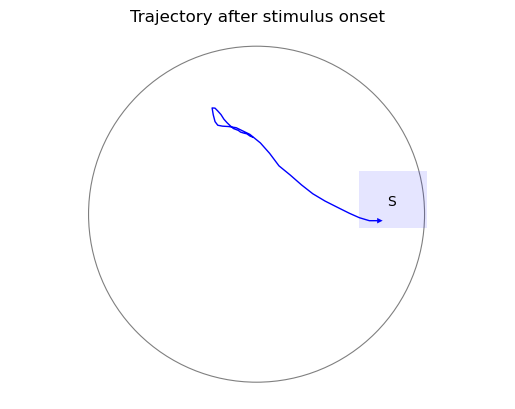

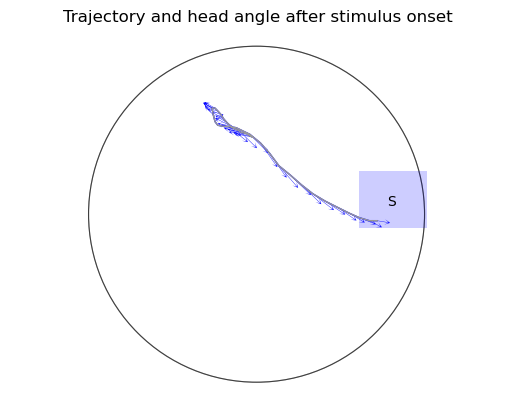

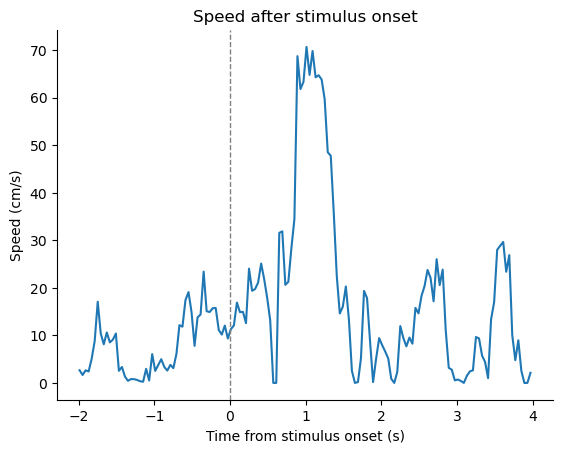

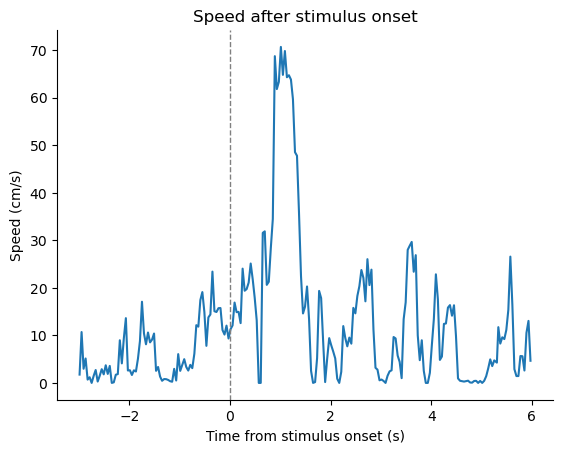

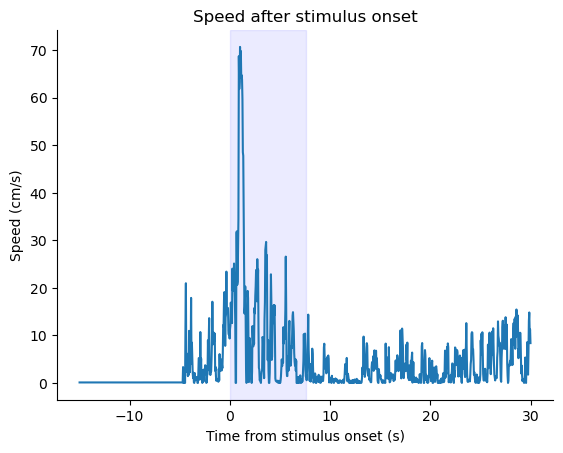

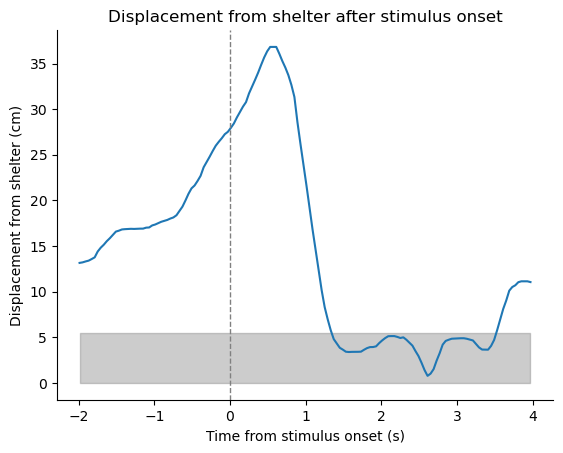

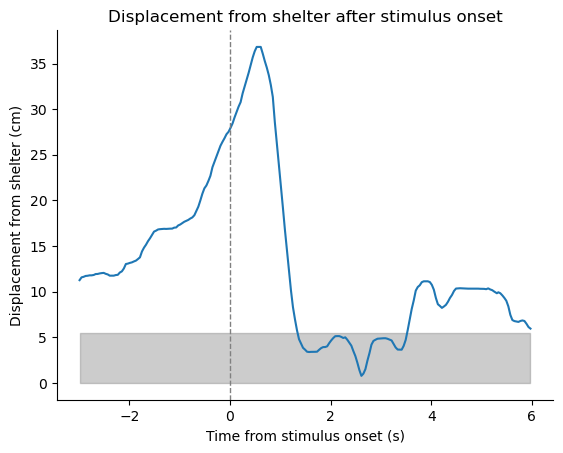

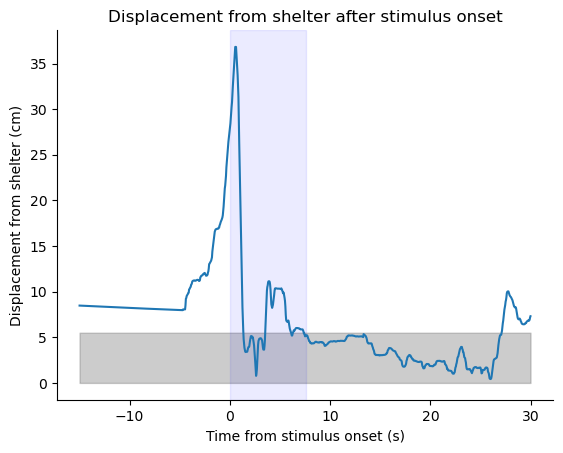

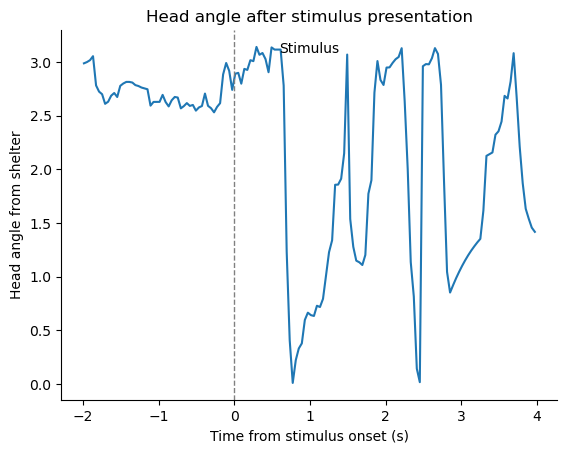

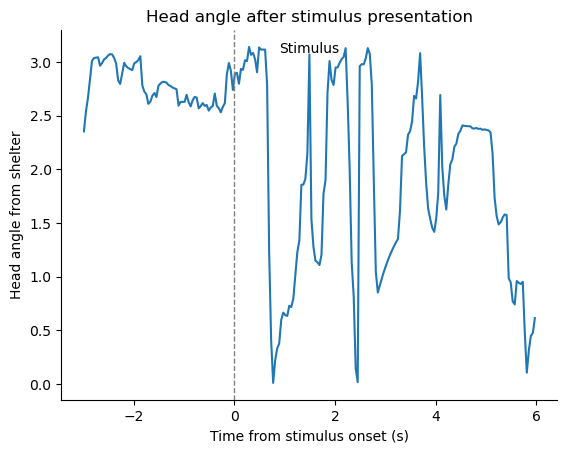

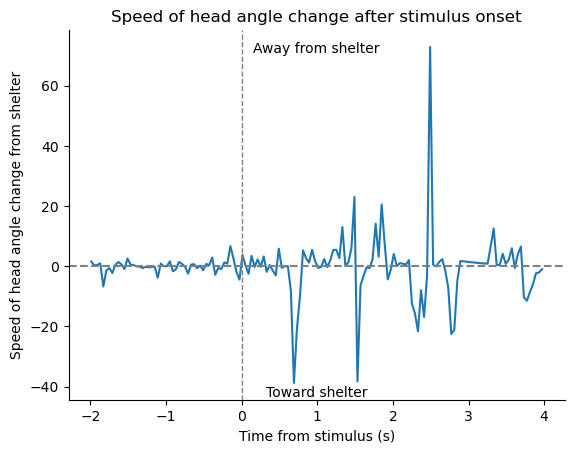

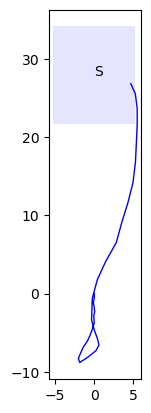

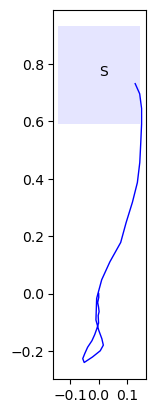

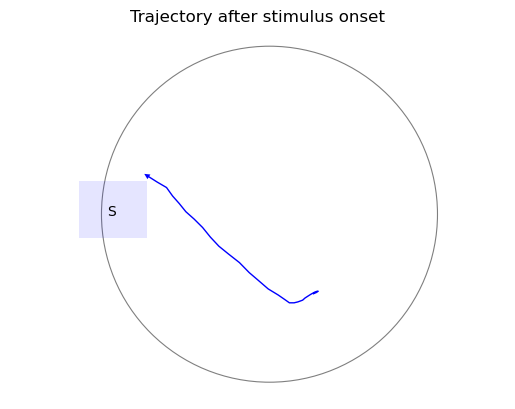

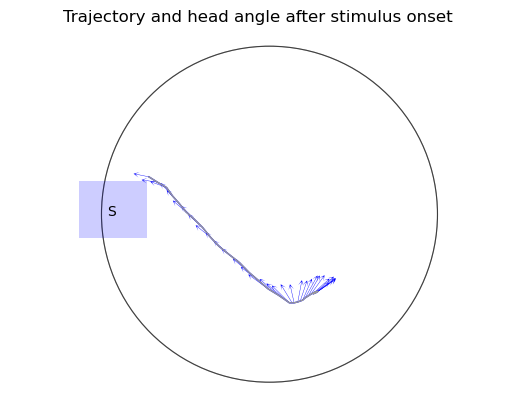

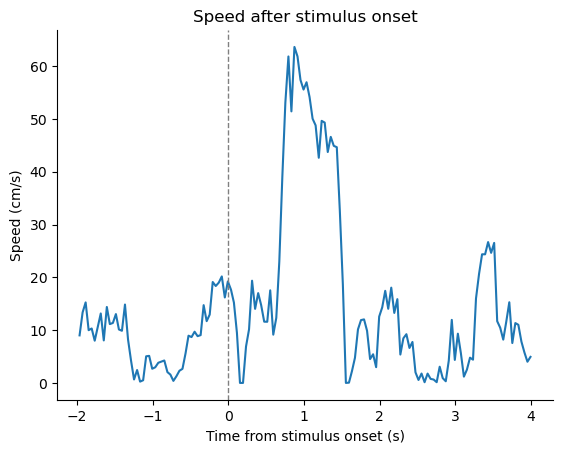

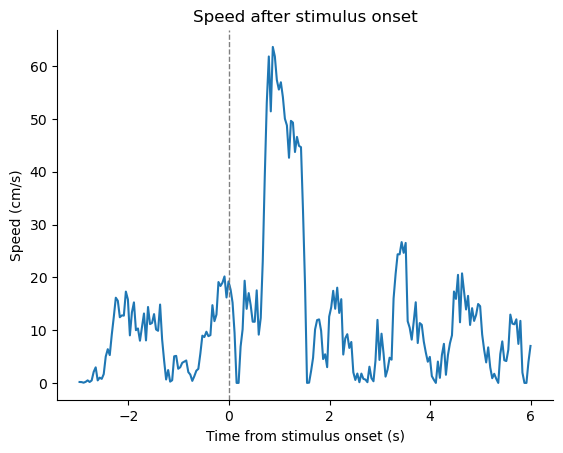

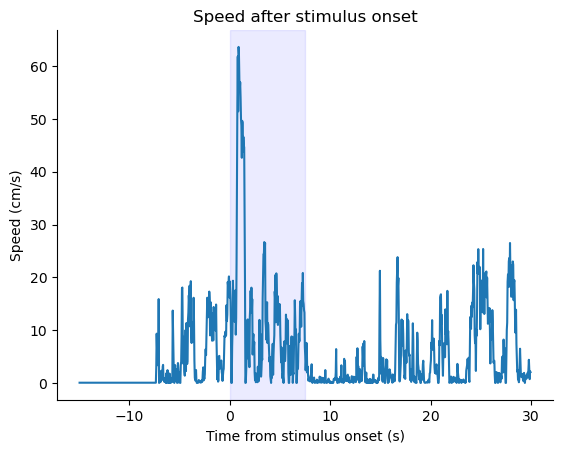

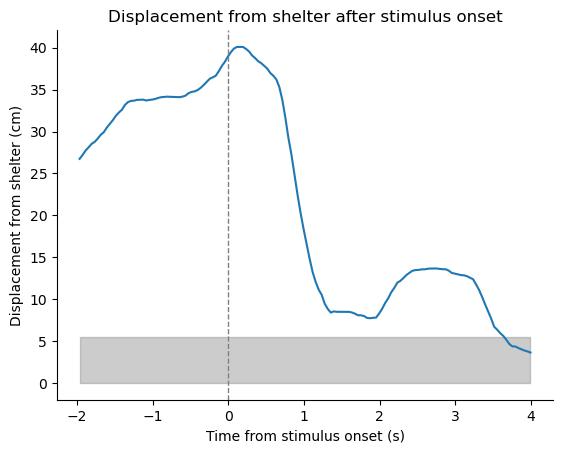

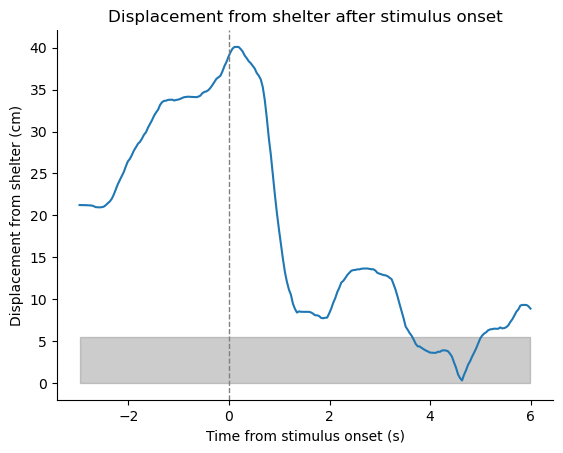

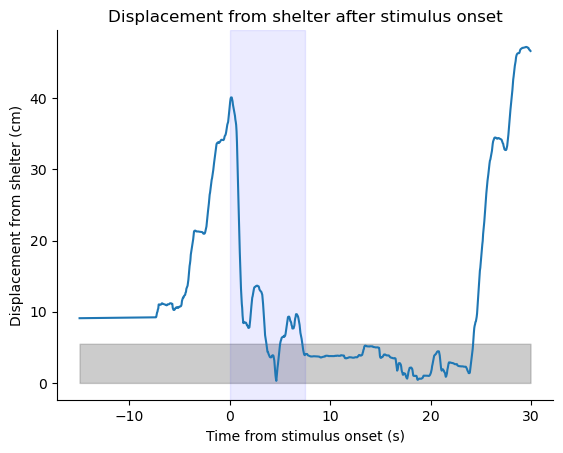

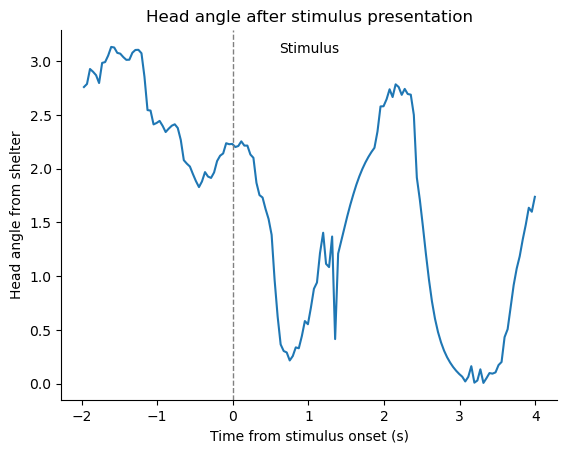

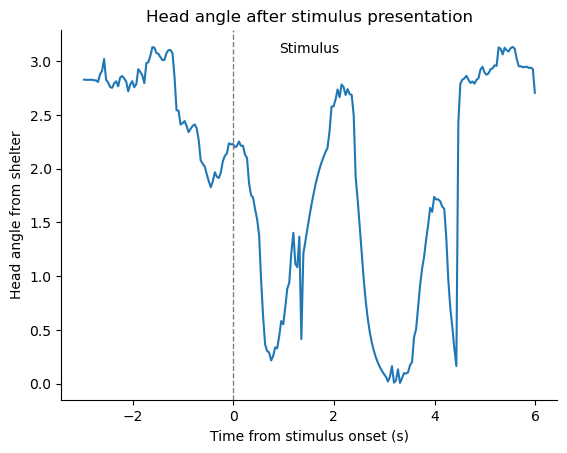

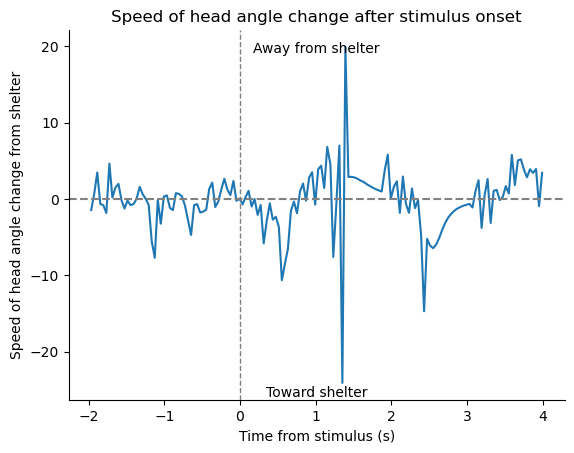

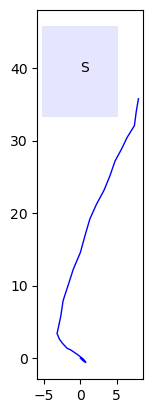

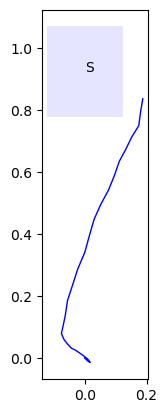

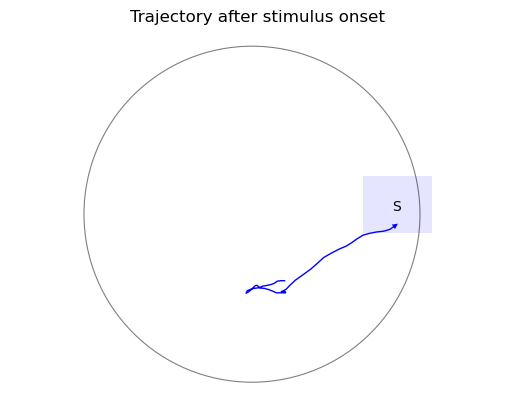

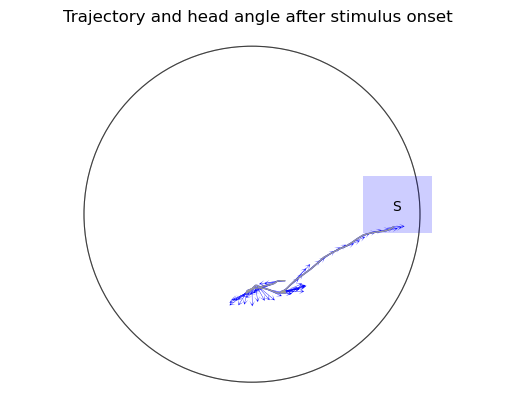

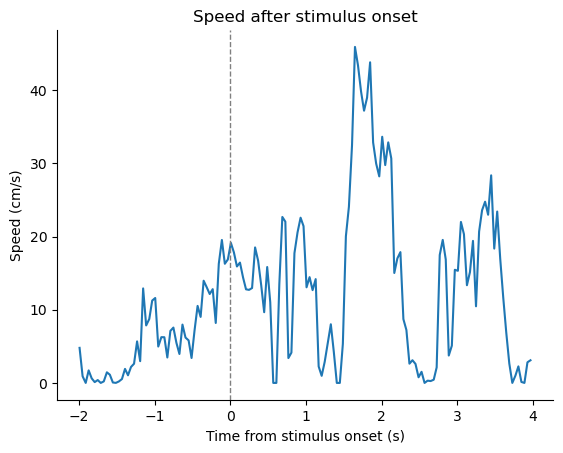

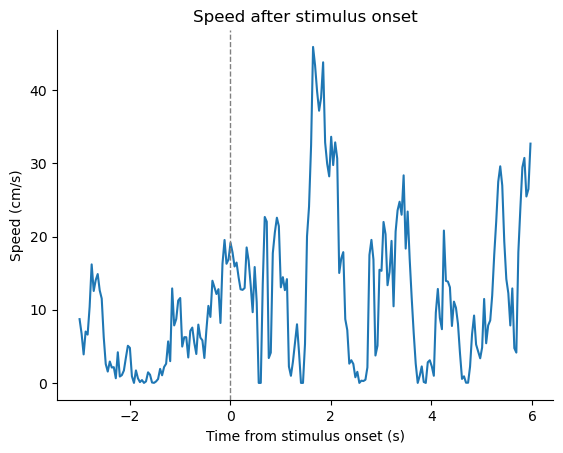

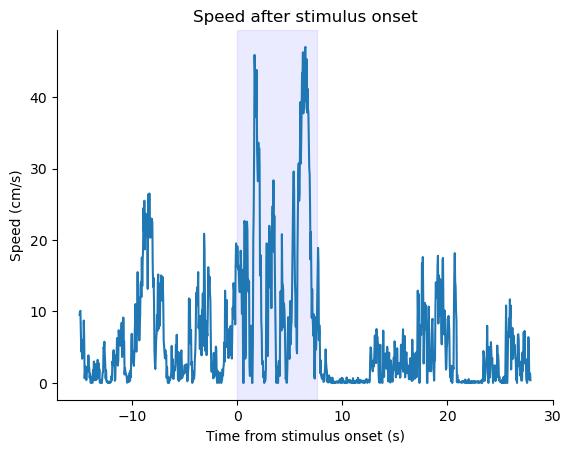

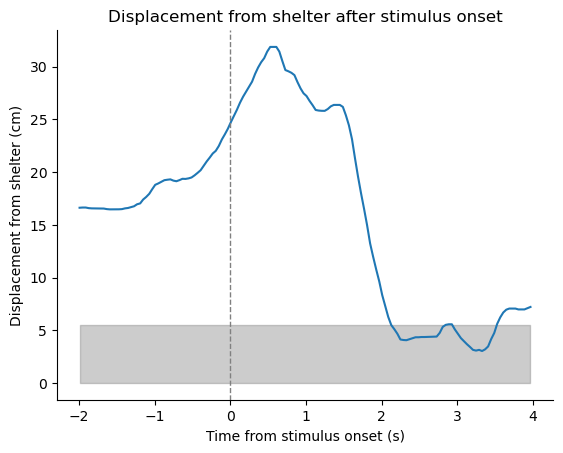

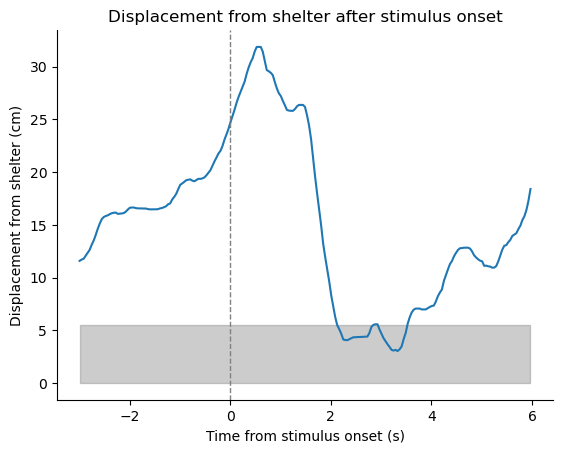

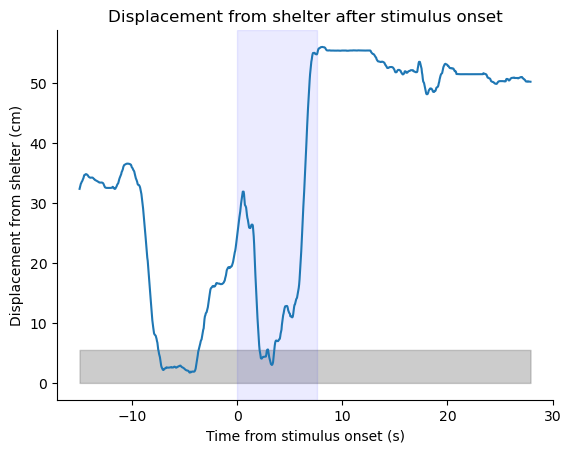

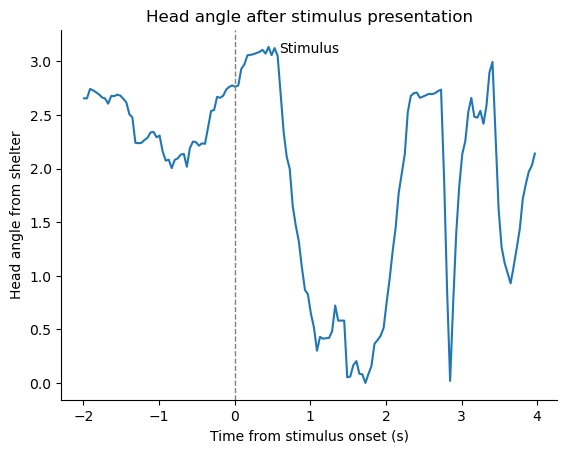

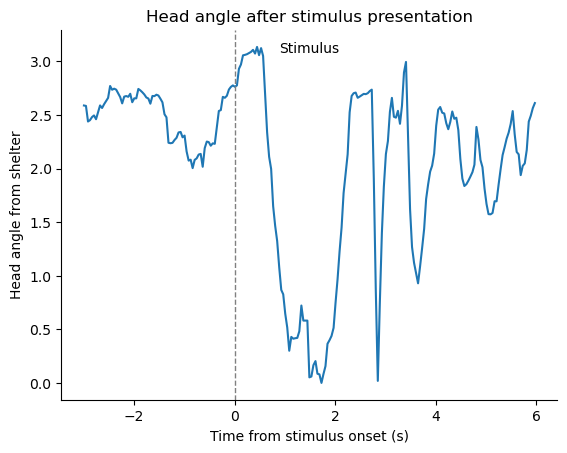

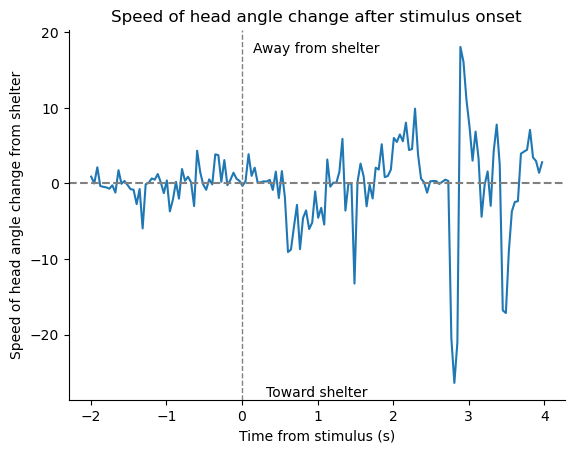

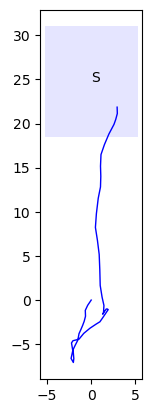

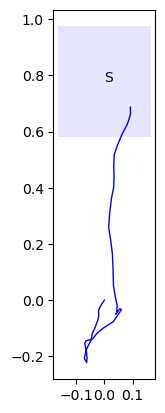

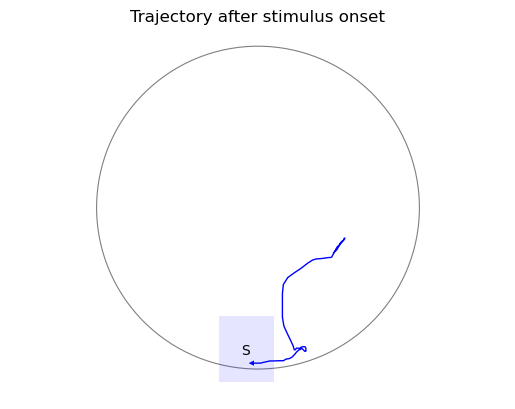

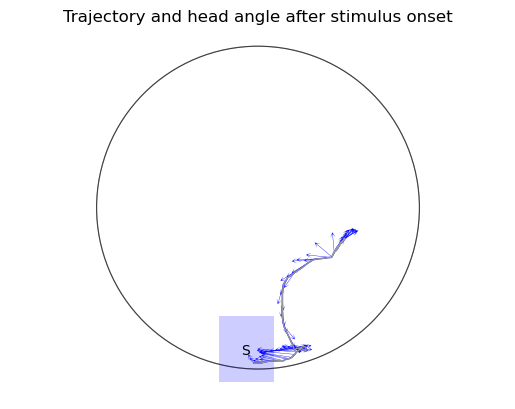

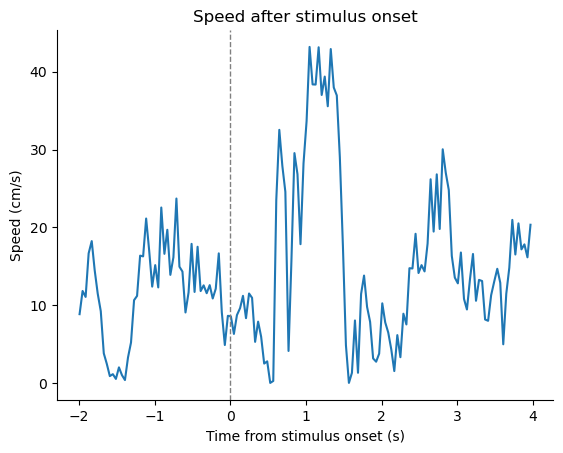

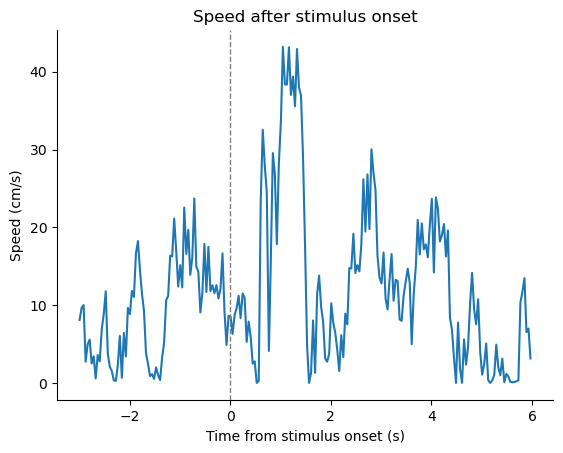

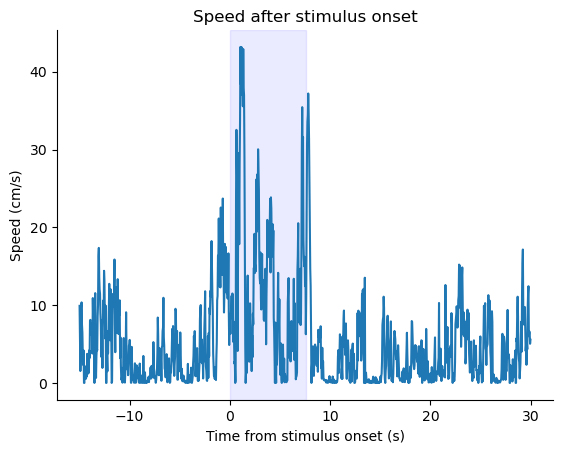

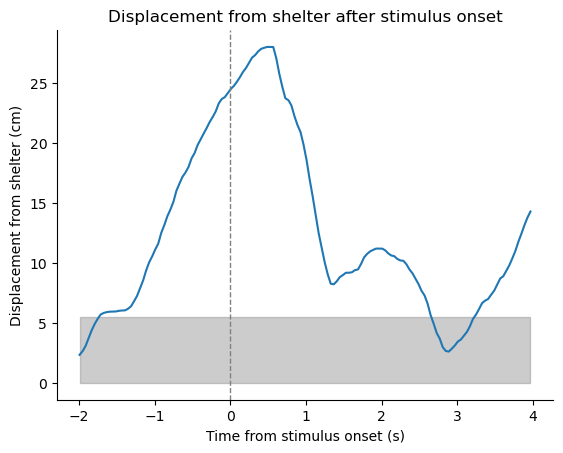

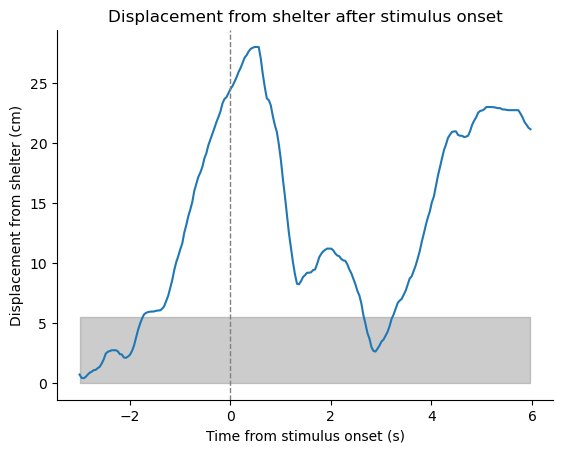

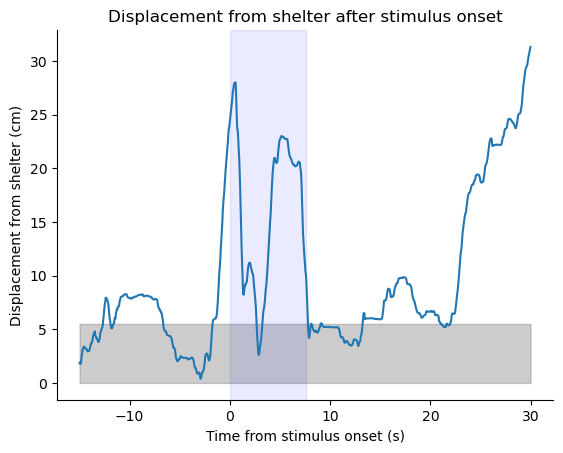

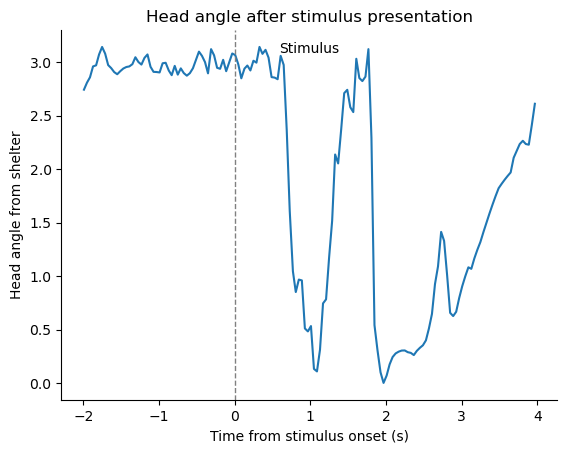

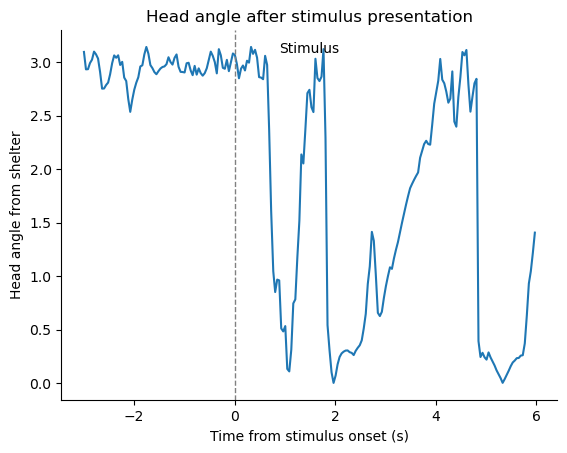

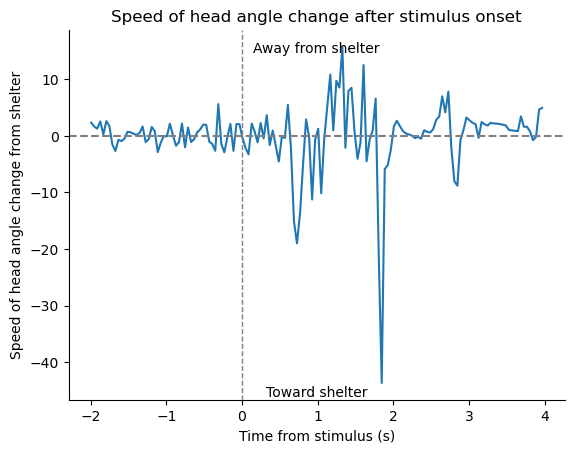

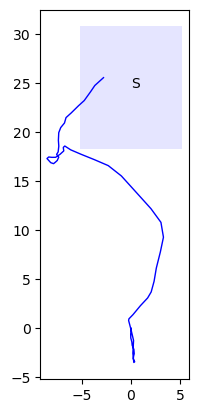

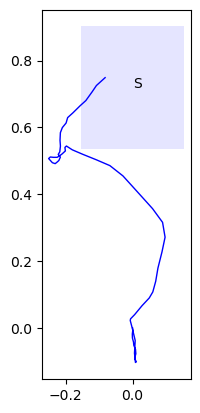

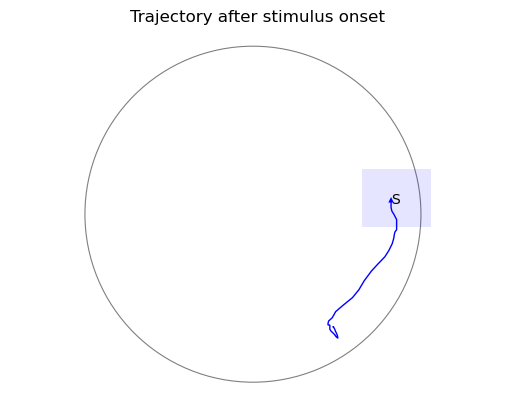

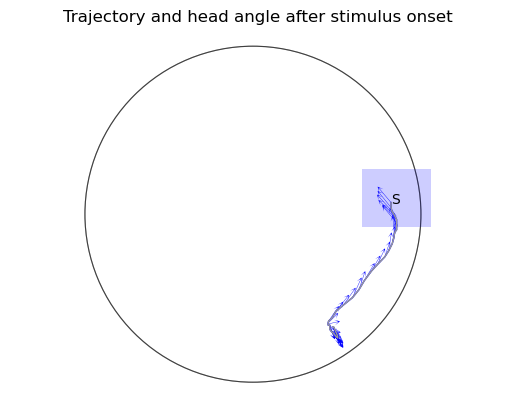

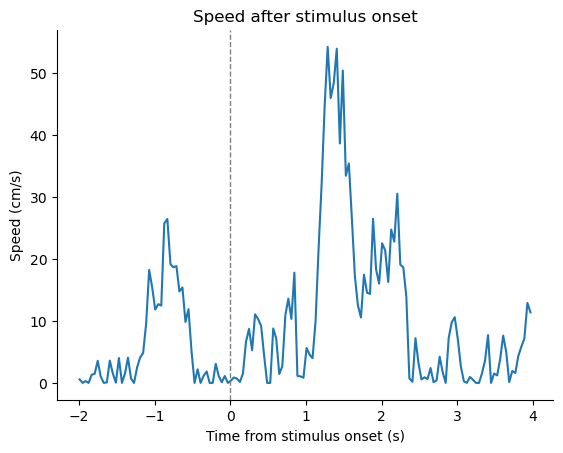

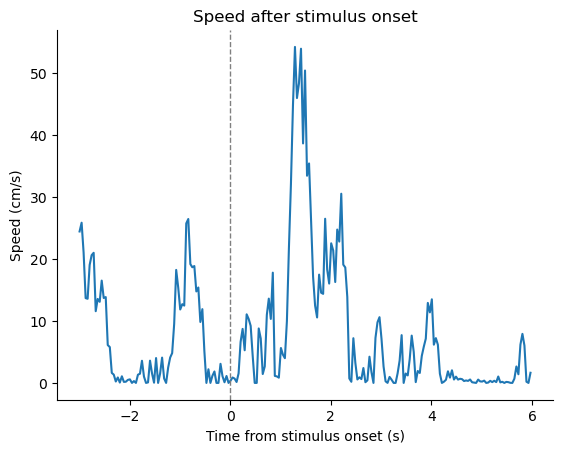

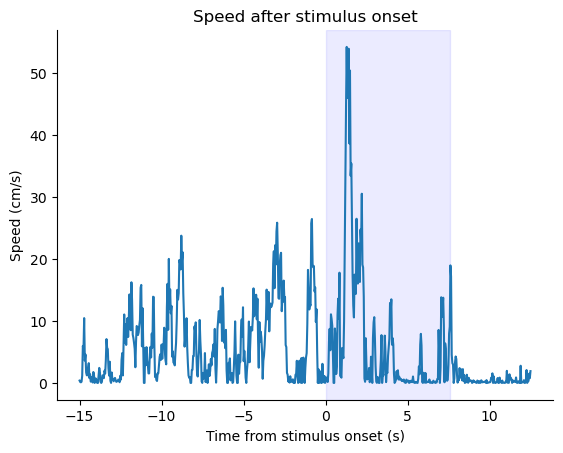

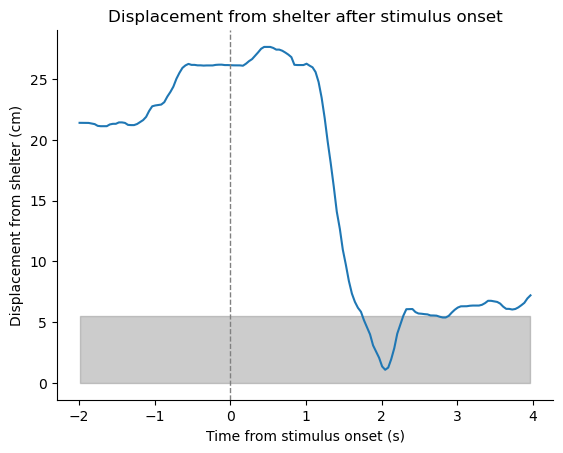

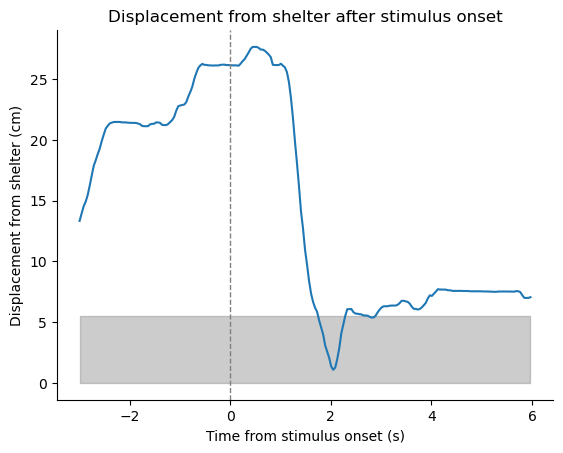

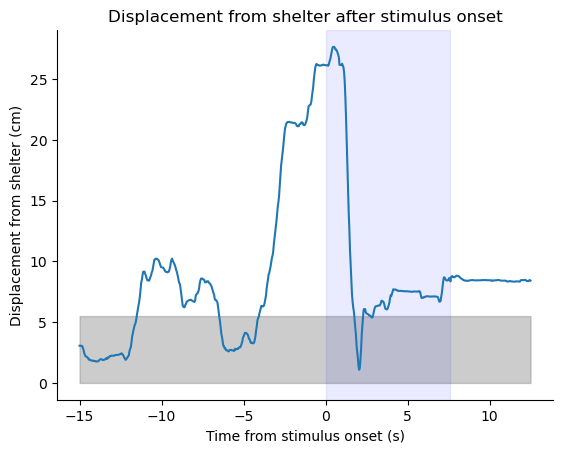

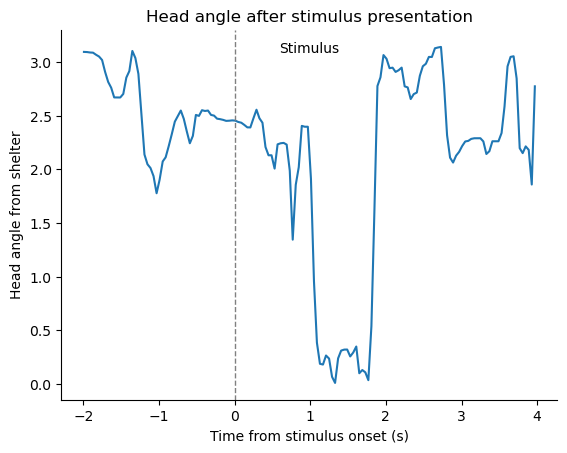

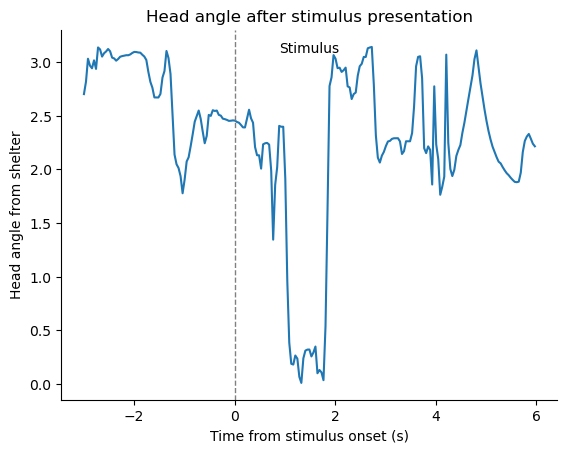

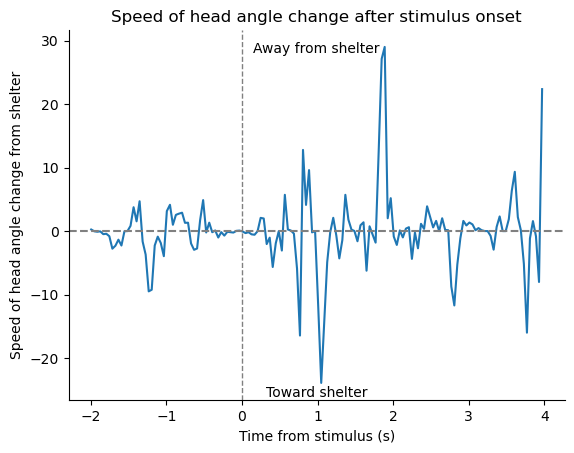

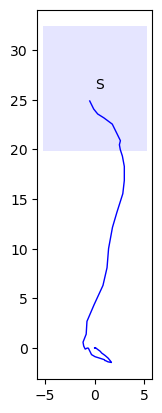

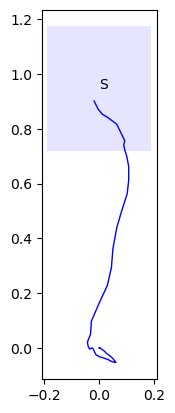

In [2]:
%run compiled_functions_recent.ipynb

%run compiled_trajectory.ipynb

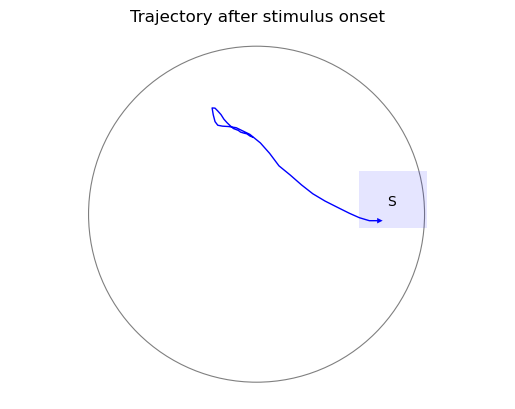

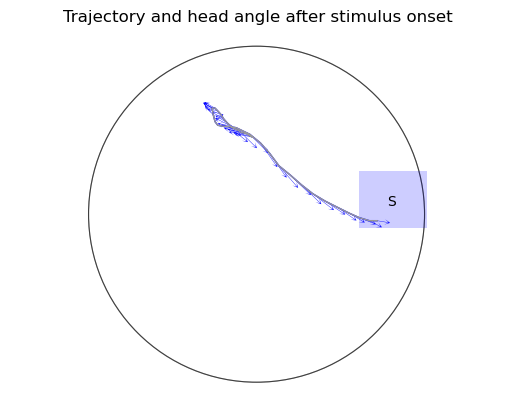

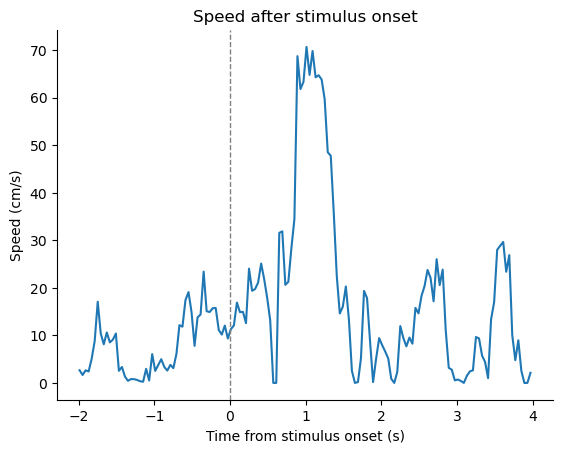

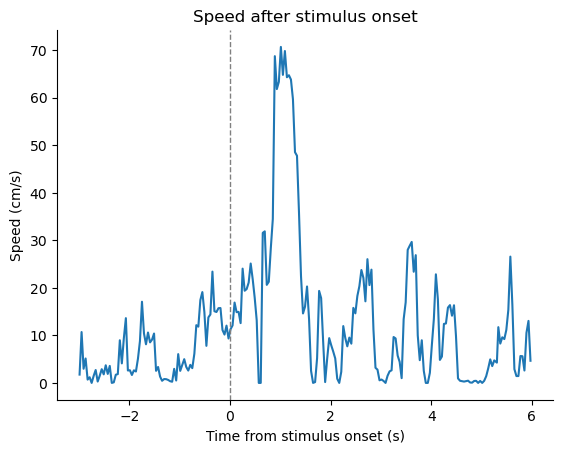

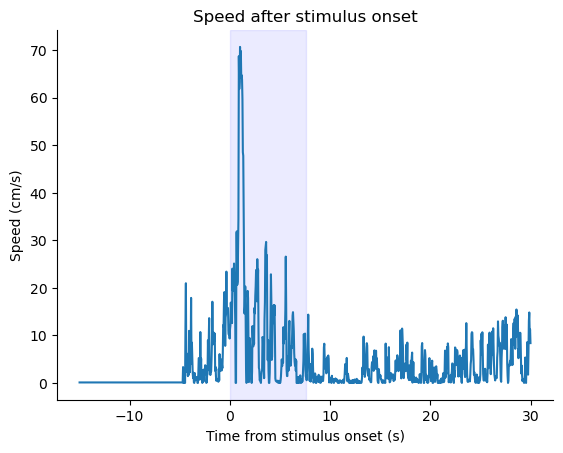

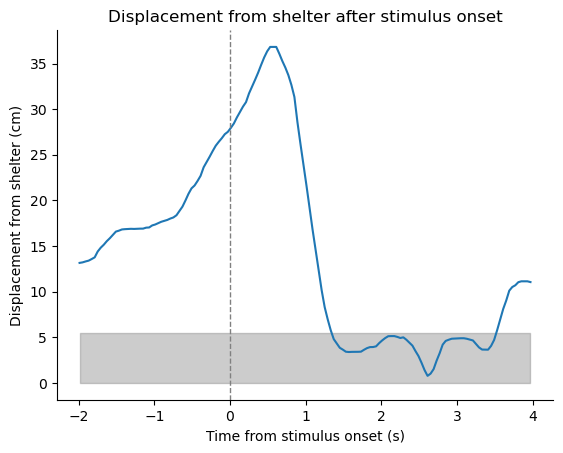

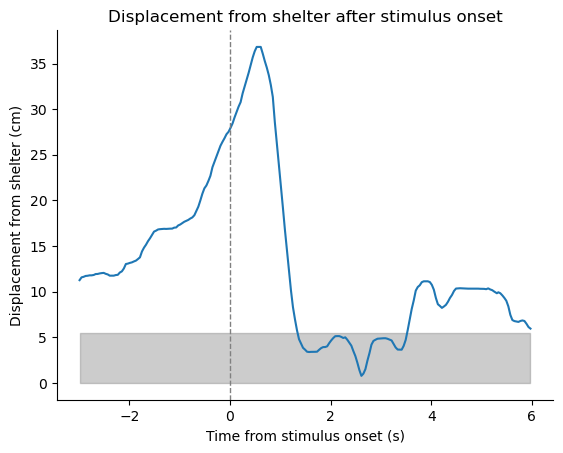

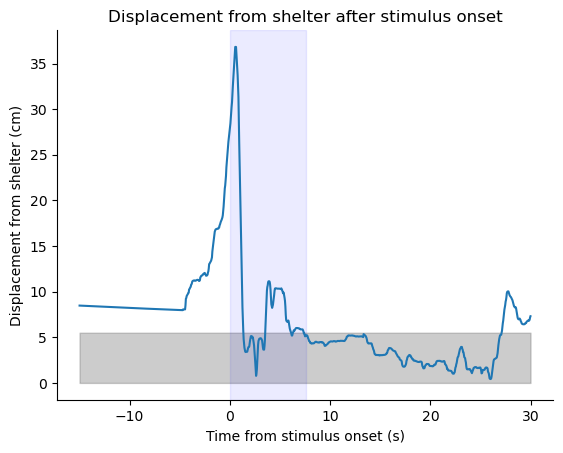

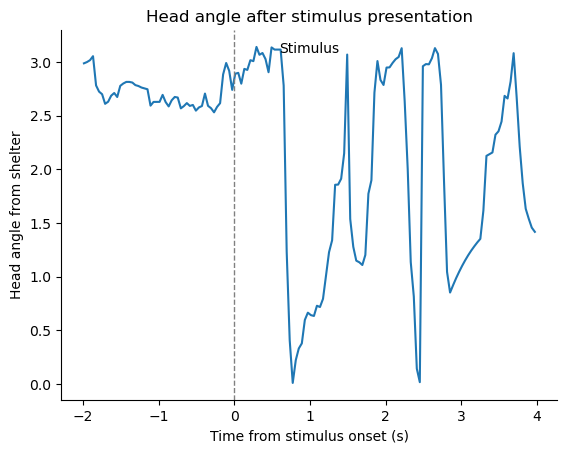

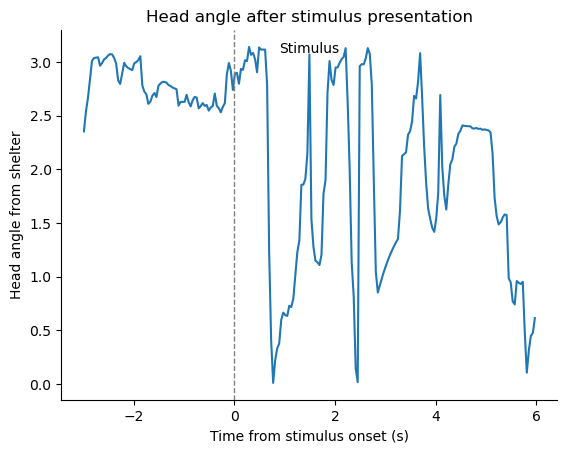

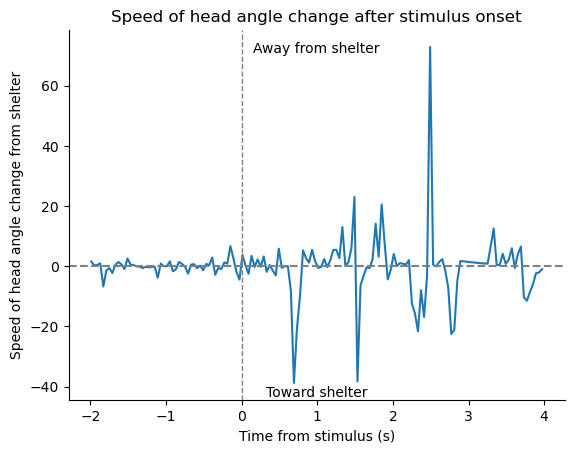

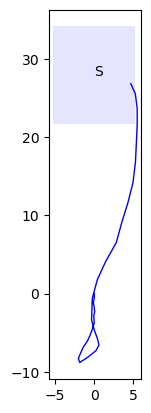

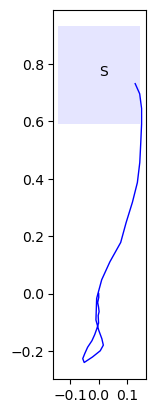

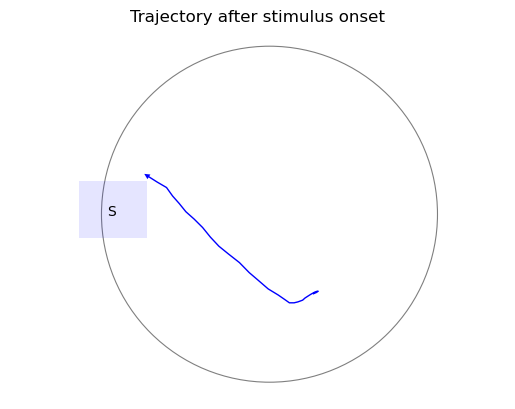

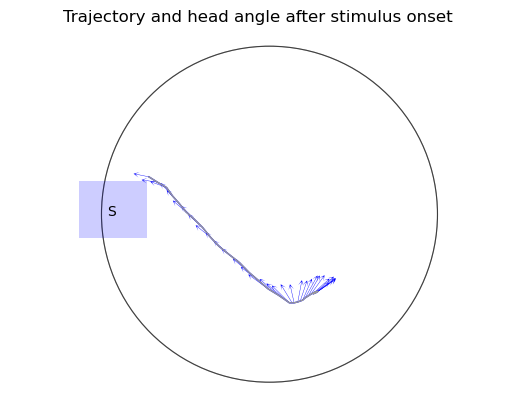

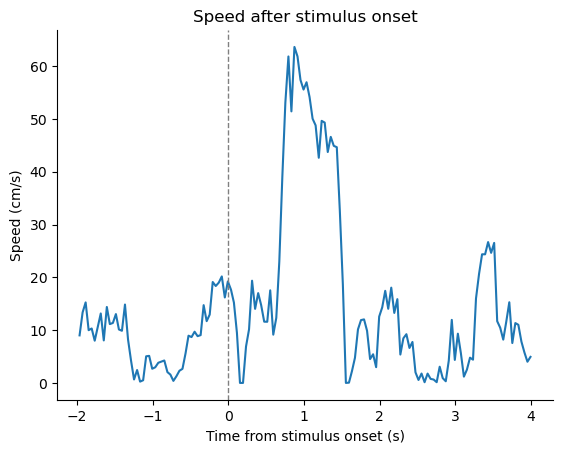

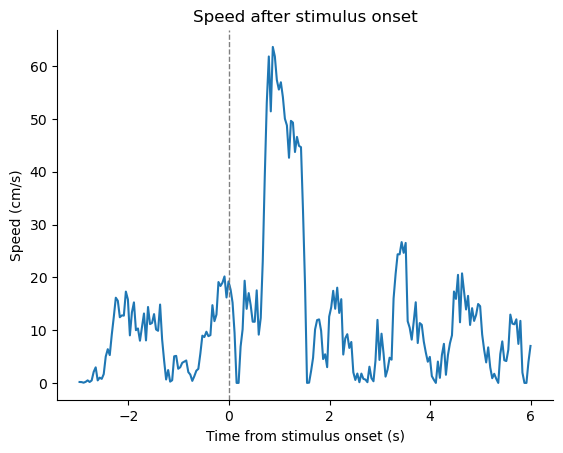

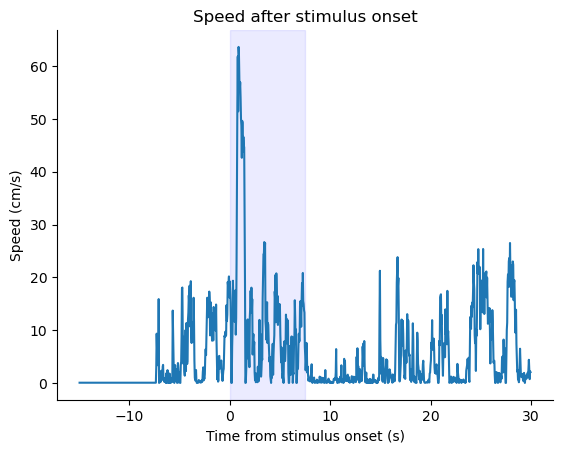

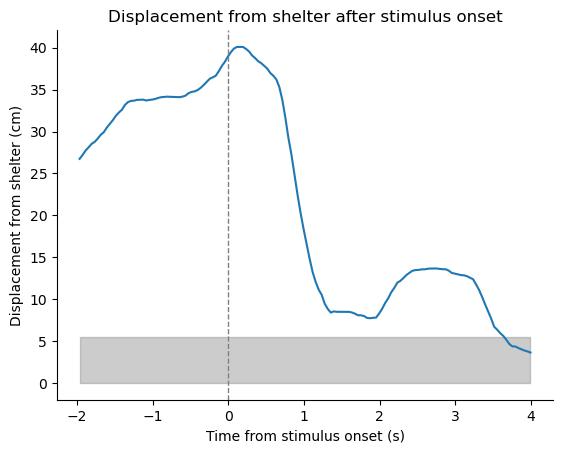

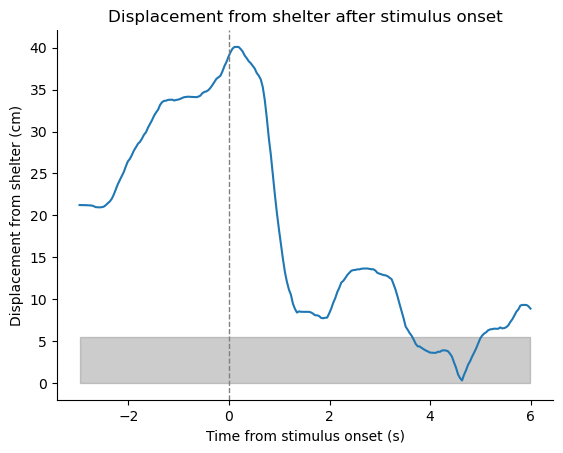

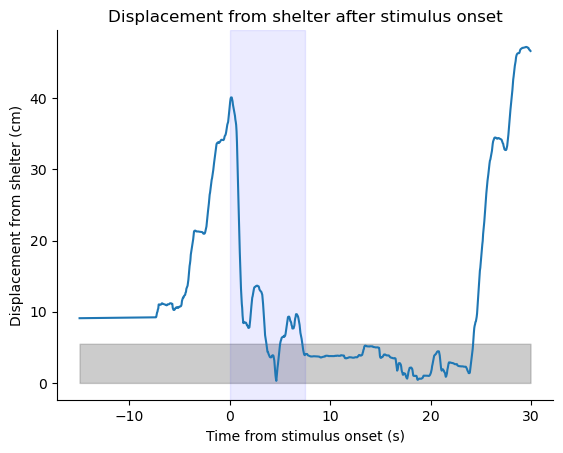

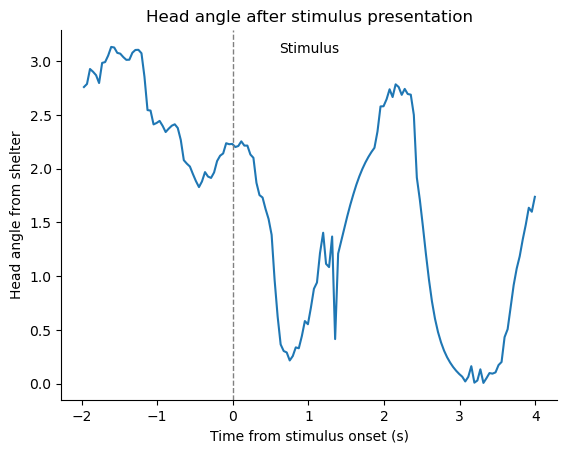

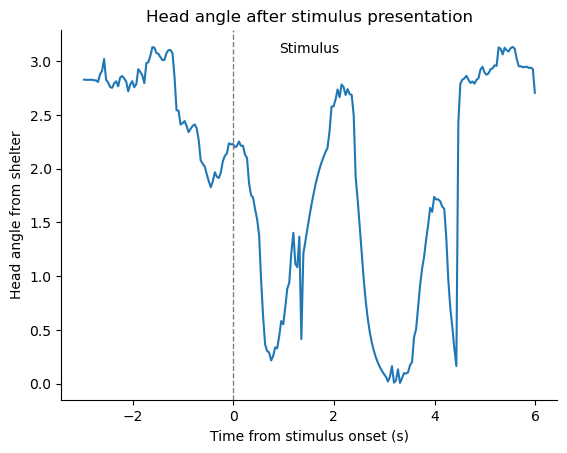

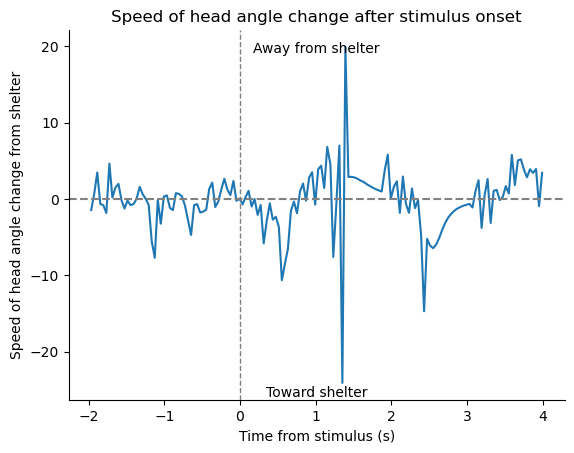

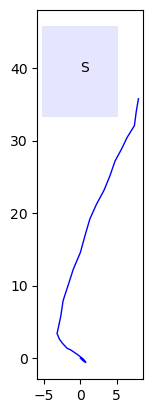

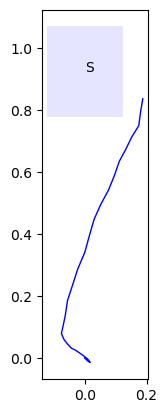

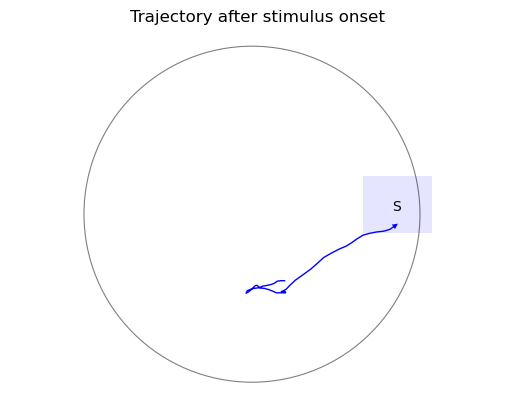

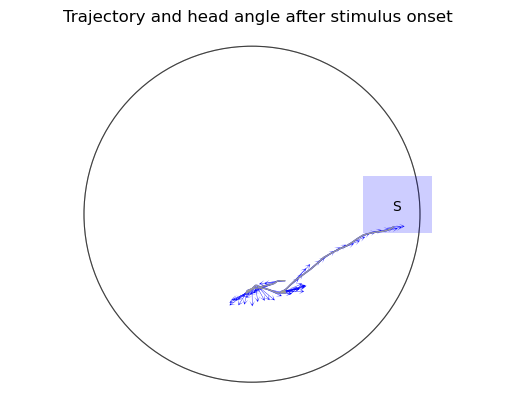

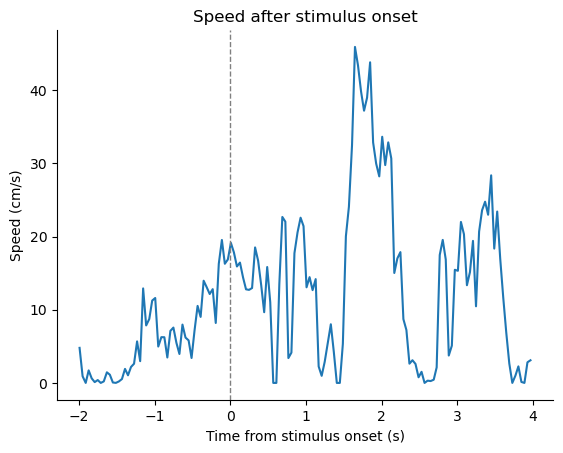

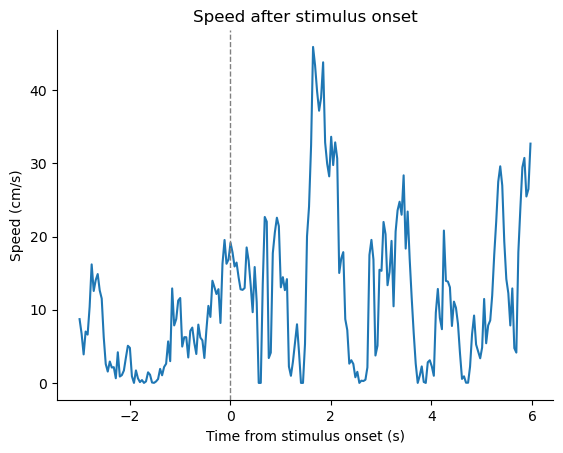

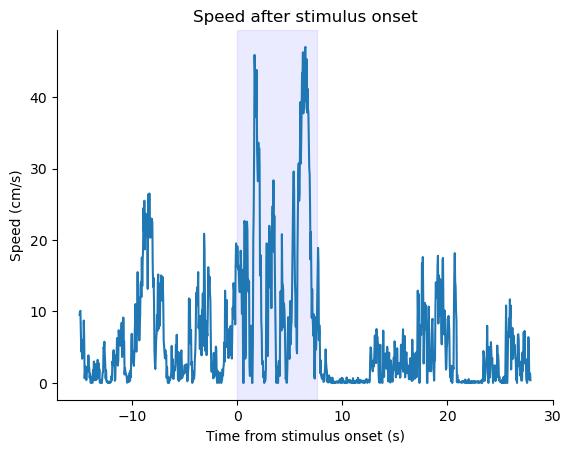

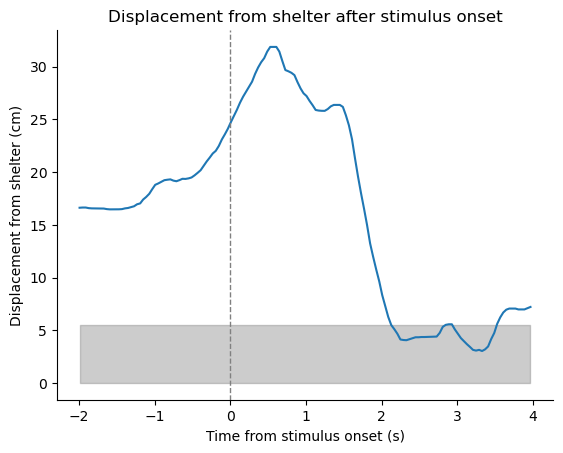

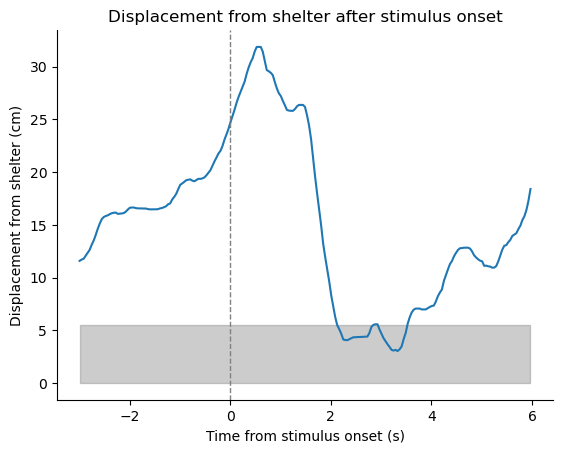

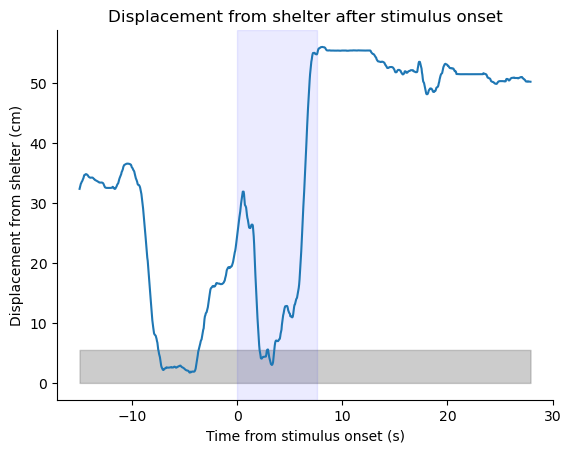

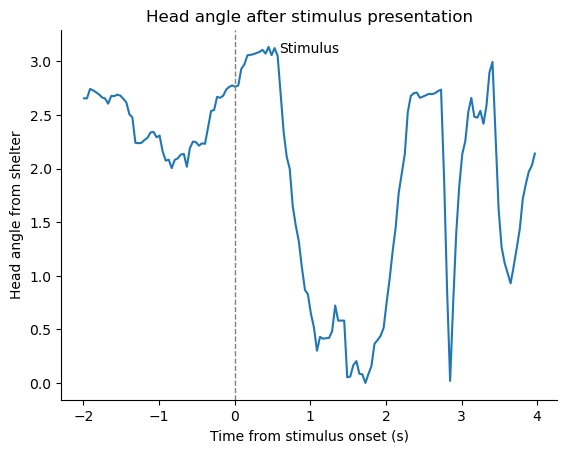

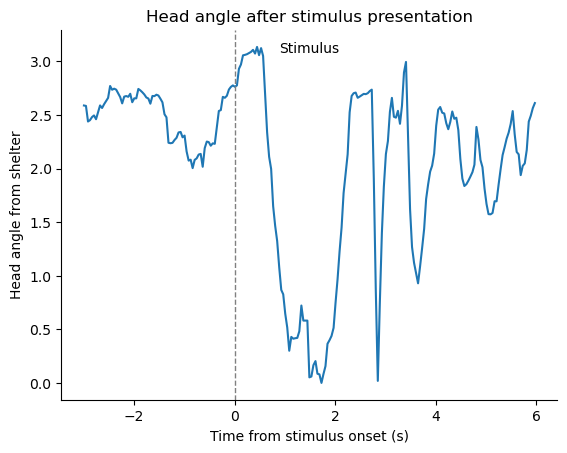

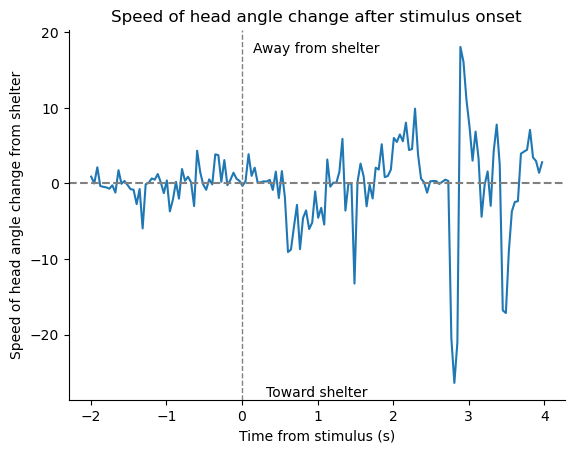

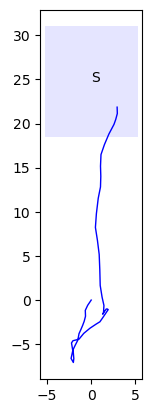

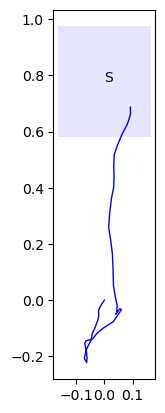

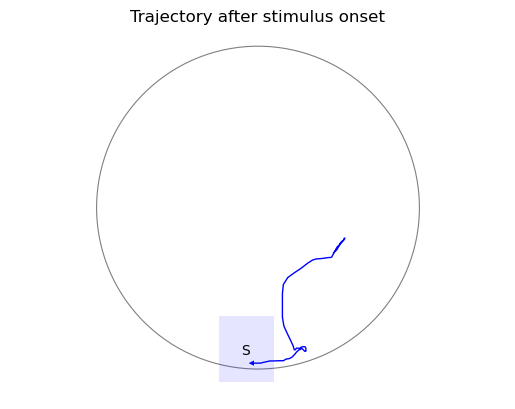

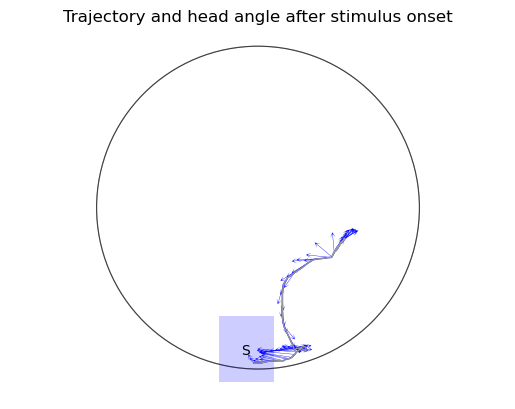

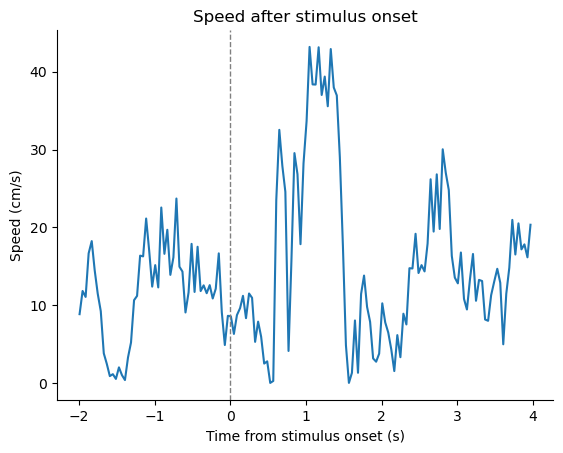

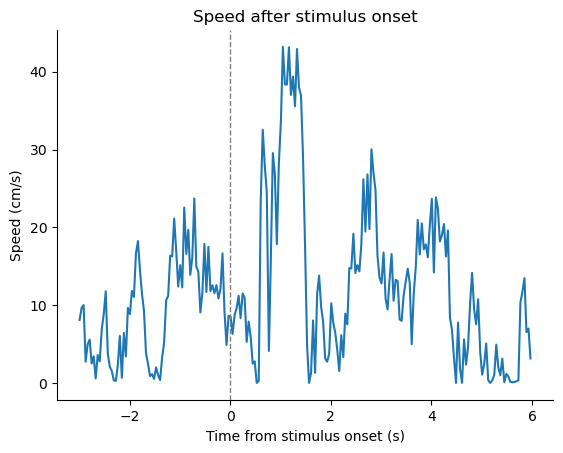

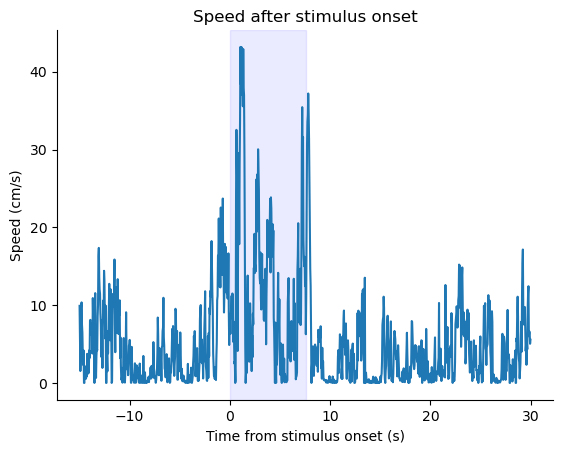

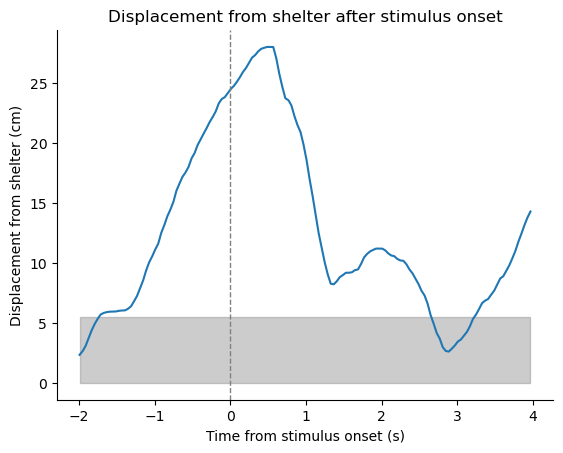

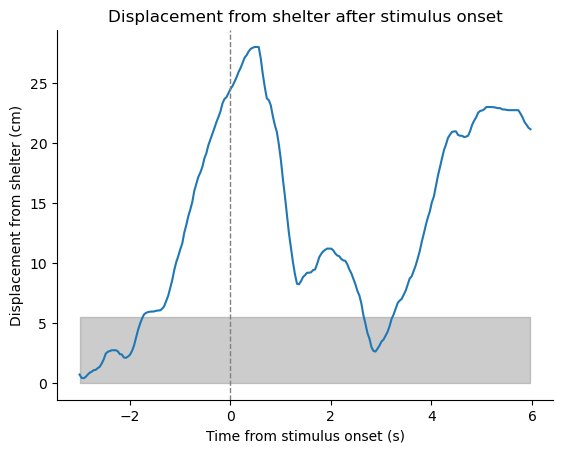

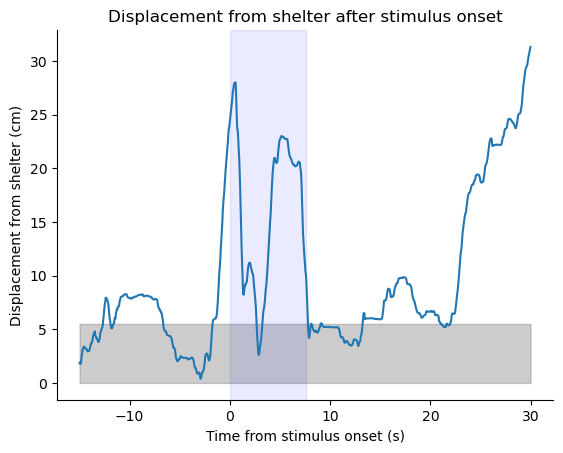

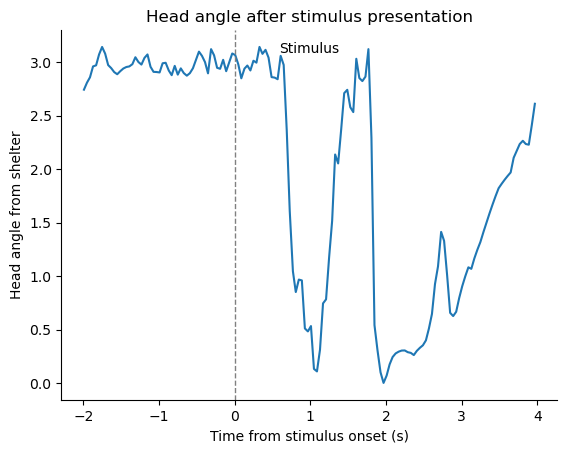

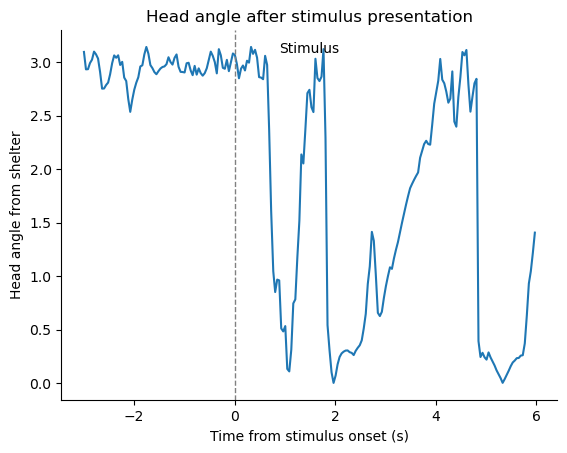

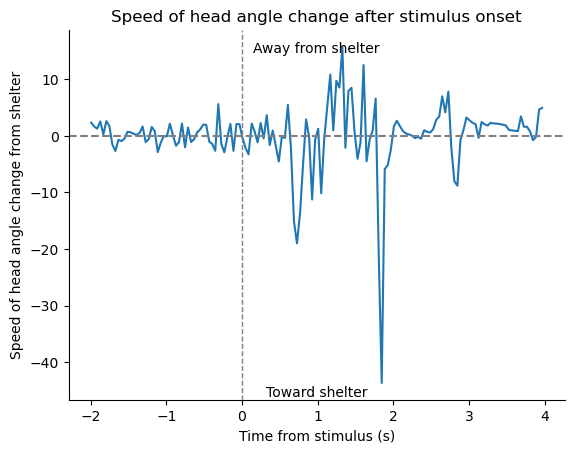

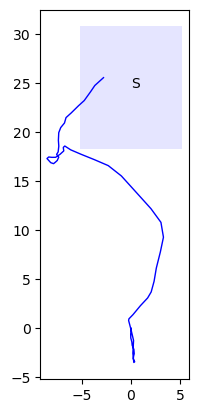

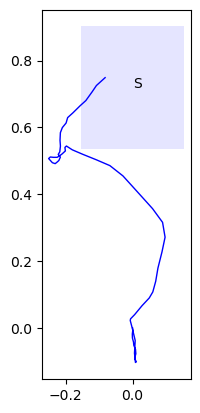

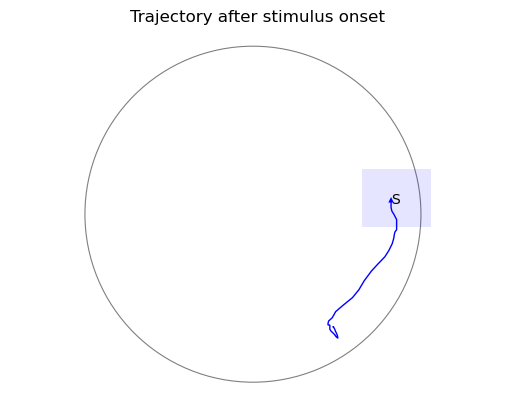

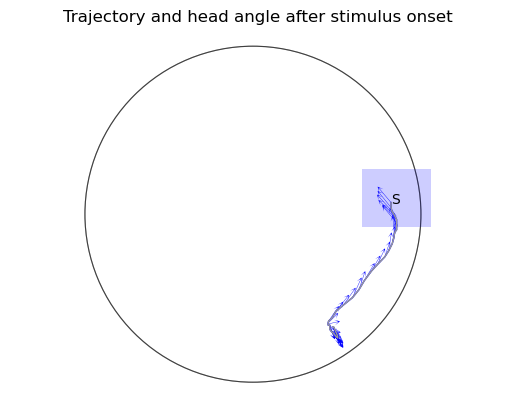

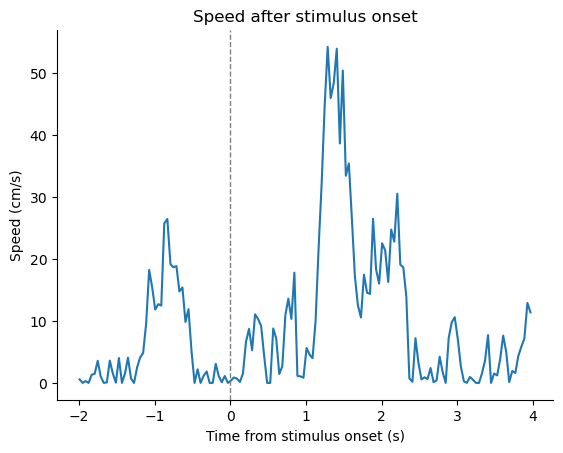

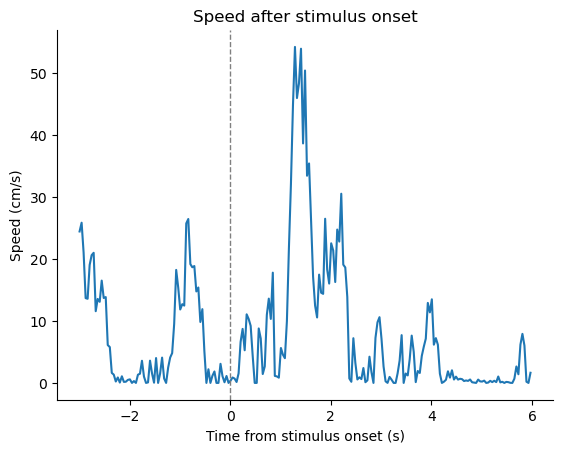

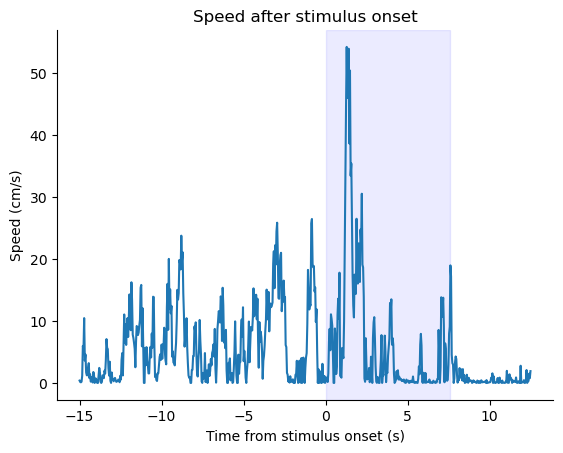

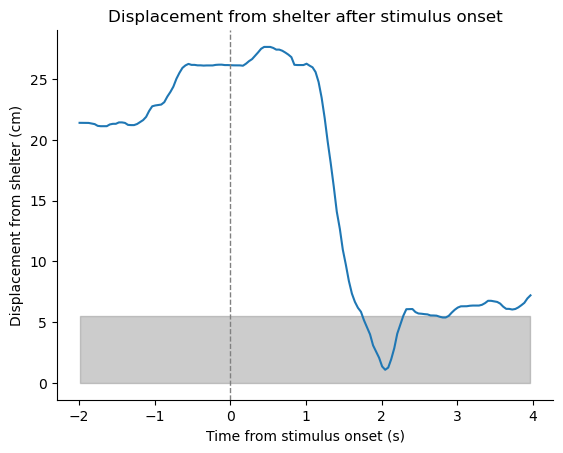

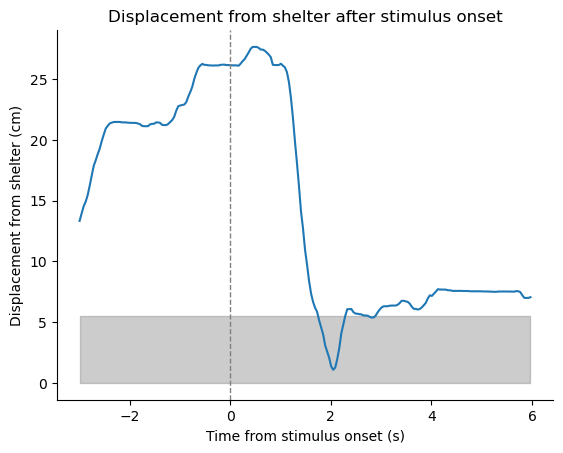

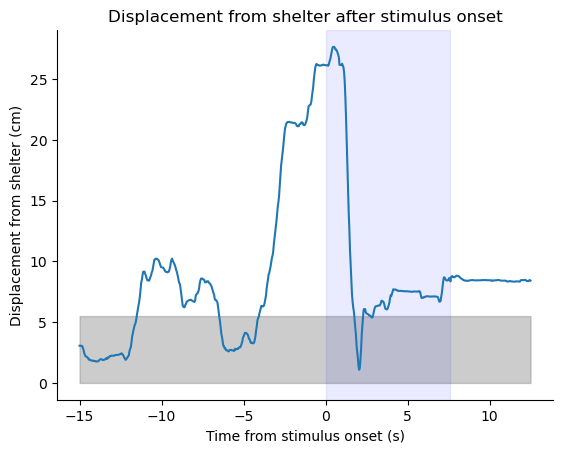

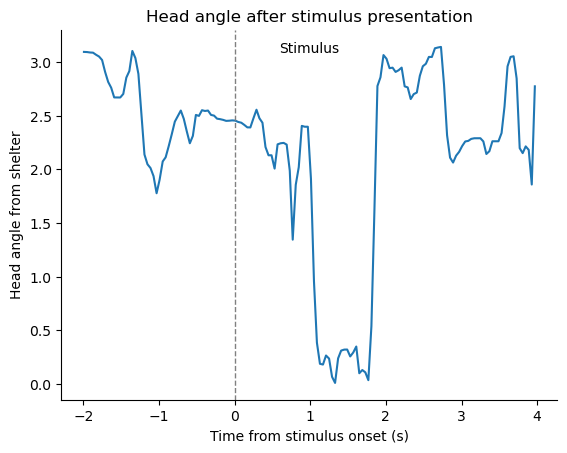

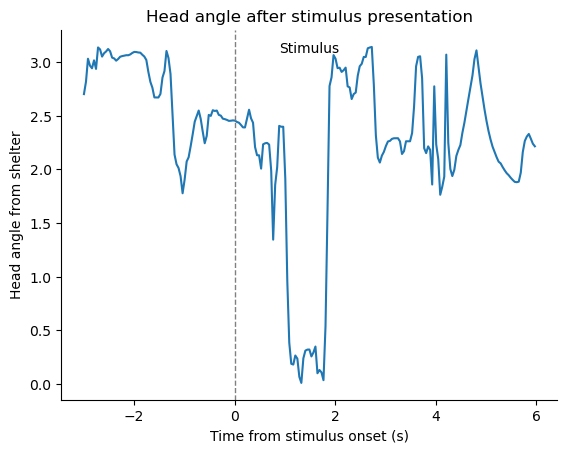

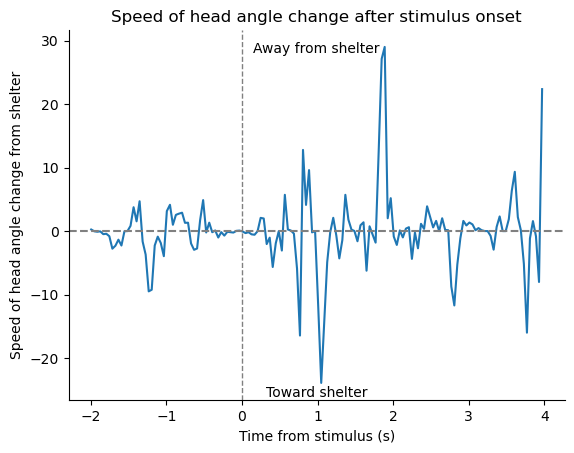

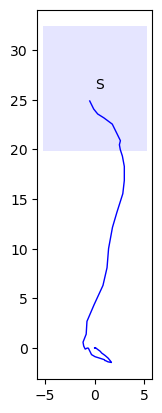

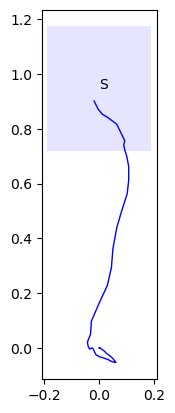

In [3]:
%run graphing_function_recent.ipynb

%run V2_M1.ipynb
M1_coord_scaled = coord_scaled
M1_escape_only = escape_only
M1_four_second = four_second
M1_six_second = six_second
M1_long_range = long_range
M1_initial_displacement = initial_displacement
M1_total_distance = total_distance
M1_shelter_x = shelter_x
M1_shelter_y = shelter_y
M1_normalized_df = normalized_df
M1_shelter_normalized_x = shelter_normalized_x
M1_shelter_normalized_y = shelter_normalized_y
M1_rotate = rotate
M1_x_diam = x_diam
M1_y_diam = y_diam

%run V2_M2.ipynb
M2_coord_scaled = coord_scaled
M2_escape_only = escape_only
M2_four_second = four_second
M2_six_second = six_second
M2_long_range = long_range
M2_initial_displacement = initial_displacement
M2_total_distance = total_distance
M2_shelter_x = shelter_x
M2_shelter_y = shelter_y
M2_normalized_df = normalized_df
M2_shelter_normalized_x = shelter_normalized_x
M2_shelter_normalized_y = shelter_normalized_y
M2_rotate = rotate
M2_x_diam = x_diam
M2_y_diam = y_diam


%run V2_M3.ipynb
M3_coord_scaled = coord_scaled
M3_escape_only = escape_only
M3_four_second = four_second
M3_six_second = six_second
M3_long_range = long_range
M3_initial_displacement = initial_displacement
M3_total_distance = total_distance
M3_shelter_x = shelter_x
M3_shelter_y = shelter_y
M3_normalized_df = normalized_df
M3_shelter_normalized_x = shelter_normalized_x
M3_shelter_normalized_y = shelter_normalized_y
M3_rotate = rotate
M3_x_diam = x_diam
M3_y_diam = y_diam


%run V2_M4.ipynb
M4_coord_scaled = coord_scaled
M4_escape_only = escape_only
M4_four_second = four_second
M4_six_second = six_second
M4_long_range = long_range
M4_initial_displacement = initial_displacement
M4_total_distance = total_distance
M4_shelter_x = shelter_x
M4_shelter_y = shelter_y
M4_normalized_df = normalized_df
M4_shelter_normalized_x = shelter_normalized_x
M4_shelter_normalized_y = shelter_normalized_y
M4_rotate = rotate
M4_x_diam = x_diam
M4_y_diam = y_diam


%run V2_M5.ipynb
M5_coord_scaled = coord_scaled
M5_escape_only = escape_only
M5_four_second = four_second
M5_six_second = six_second
M5_long_range = long_range
M5_initial_displacement = initial_displacement
M5_total_distance = total_distance
M5_shelter_x = shelter_x
M5_shelter_y = shelter_y
M5_normalized_df = normalized_df
M5_shelter_normalized_x = shelter_normalized_x
M5_shelter_normalized_y = shelter_normalized_y
M5_rotate = rotate
M5_x_diam = x_diam
M5_y_diam = y_diam

In [4]:
n=5

In [5]:
def compile_parameters():
    plt.figure()
    ax=plt.axes()

    x = displacement_inter_six['time']
    y = displacement_inter_six['average']
    y_up = displacement_inter_six['SEM_up']
    y_down = displacement_inter_six['SEM_down']

    ax.plot(x,y, label = 'displacement')
    ax.plot(x,y_up, color = 'none')
    ax.plot(x,y_down, color = 'none')
    plt.fill_between(x,y_up, y_down, color = 'blue', alpha = .05)
    ax.set_xlabel('Time from stimulus onset (s)')
    ax.set_ylabel('Normalized values') #convert to cm - cm/s
    ax.set_title('Average displacement, speed, and head angle after stimulus onset')
    plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)

    xs = speed_inter_six['time']
    ys = speed_inter_six['average']
    y_ups = speed_inter_six['SEM_up']
    y_downs = speed_inter_six['SEM_down']

    ax.plot(xs,ys, color='red', label = 'speed')
    ax.plot(xs,y_ups, color = 'none')
    ax.plot(xs,y_downs, color = 'none')
    plt.fill_between(xs,y_ups, y_downs, color = 'red', alpha = .05)

    xa = angle_inter_six['time']
    ya = angle_inter_six['average']
    y_upa = angle_inter_six['SEM_up']
    y_downa = angle_inter_six['SEM_down']

    ax.plot(xa,ya, color='green', label = 'head angle')
    ax.plot(xa,y_upa, color = 'none')
    ax.plot(xa,y_downa, color = 'none')
    plt.fill_between(xa,y_upa, y_downa, color = 'green', alpha = .05)

    plt.legend(loc = 'upper right')
    return plt

In [6]:
def plot_linearity_ratio(n):
    plt.figure()
    ax = plt.axes()
    
    max_x = float('-inf')
    min_x = float('inf')


    for i in range(1, n+1):
        x_data = globals()[f'M{i}_initial_displacement']
        y_data = globals()[f'M{i}_total_distance']
        ax.scatter(x_data, y_data)
        
        # Update min and max values for x and y data
        max_x = max(max_x, x_data.max())
        min_x = min(min_x, x_data.min())
    
    # Plot y=x line based on x_data range
    ax.plot([min_x, max_x], [min_x, max_x], color='gray', linestyle='--', linewidth=1)
    
    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.yaxis.set_major_locator(plt.MultipleLocator(10))
    
    ax.set_ylabel('Total distance traveled (cm)') #convert to cm - cm/s
    ax.set_title('Initial displacement from shelter (cm)')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
            
    return plt

In [7]:
#interpolate data, combine into one dataframe, and find mean/SEM - input number of mice, start, ,stop, step, column of interest, dataframe of interes
#displacement 
displacement_inter_four = interpolate_all(n, -2, 4, .04, 'displacement', 'four_second')
summarize_data(n, 'four_second_interpolated', displacement_inter_four)

displacement_inter_six = interpolate_all(n, -3, 6, .04, 'displacement', 'six_second')
summarize_data(n, 'six_second_interpolated', displacement_inter_six)

#speed
speed_inter_four = interpolate_all(n, -2, 4, .04, 'speed', 'four_second')
summarize_data(n, 'four_second_interpolated', speed_inter_four)

speed_inter_six = interpolate_all(n, -3, 6, .04, 'speed', 'six_second')
summarize_data(n, 'six_second_interpolated', speed_inter_six)

#head angle
angle_inter_four = interpolate_all(n, -2, 4, .04, 'head_angle', 'four_second')
summarize_data(n, 'four_second_interpolated', angle_inter_four)

angle_inter_six = interpolate_all(n, -3, 6, .04, 'head_angle', 'six_second')
summarize_data(n, 'six_second_interpolated', angle_inter_six)



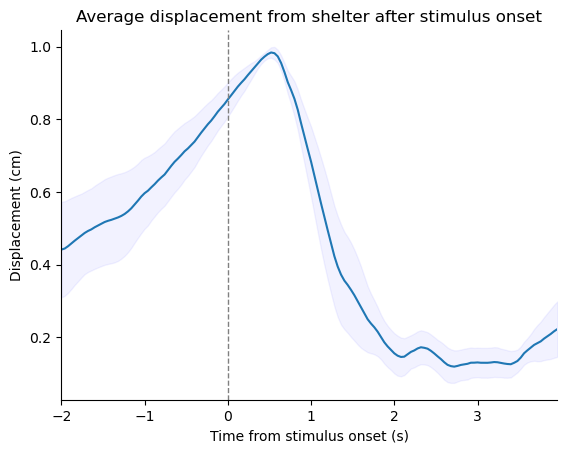

In [8]:
plot_compiled_displacement(displacement_inter_four,7.5, 4)

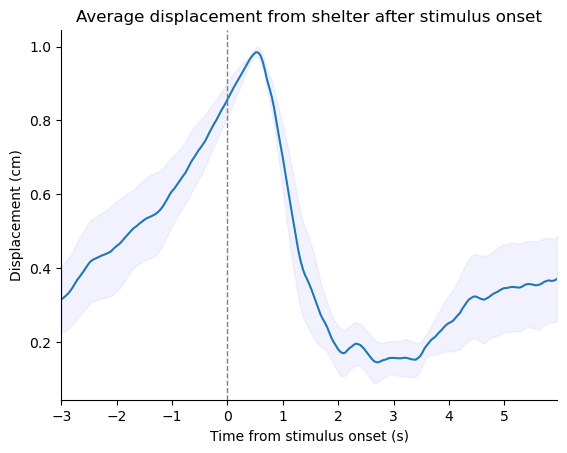

In [9]:
plot_compiled_displacement(displacement_inter_six, 7.5,4)

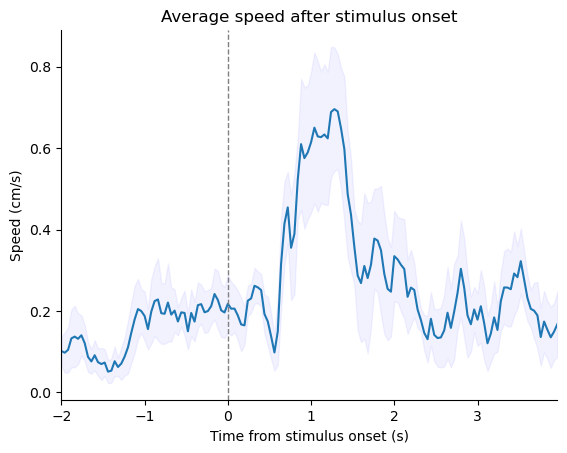

In [10]:
plot_compiled_speed(speed_inter_four,7.5, 4)

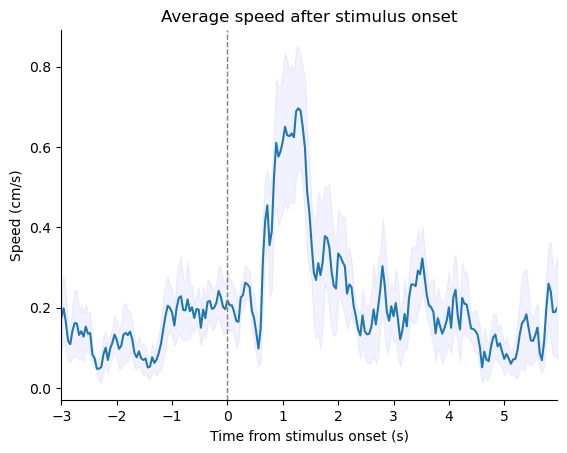

In [11]:
plot_compiled_speed(speed_inter_six, 7.5,4)

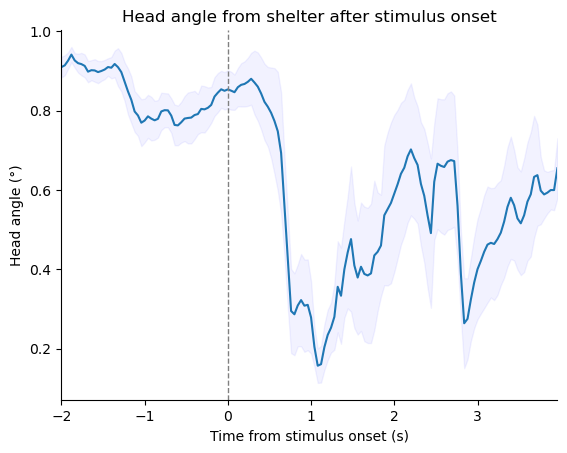

In [12]:
plot_compiled_angle(angle_inter_four,7.5, 4)

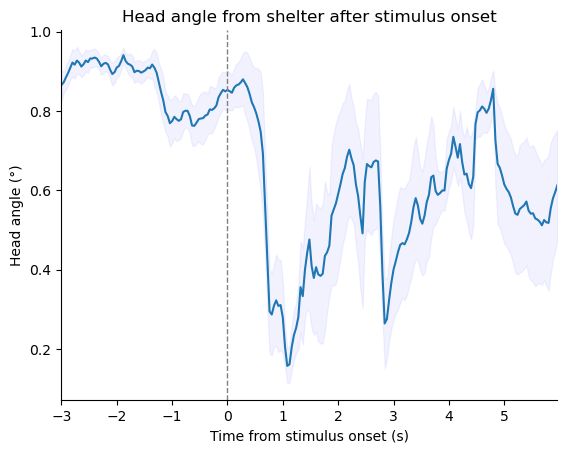

In [13]:
plot_compiled_angle(angle_inter_six, 7.5,4)

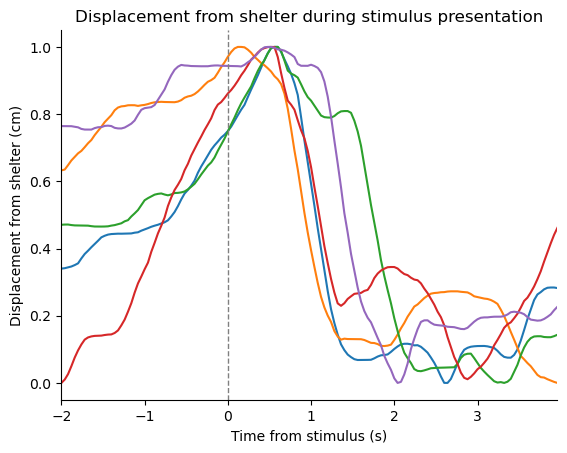

In [14]:
plot_all_displacement(displacement_inter_four, mouse_columns(n, 'four_second_interpolated'), 7, 4)

In [15]:
displacement_inter_four

M1_four_second_interpolated  M2_four_second_interpolated  \
0                       0.340235                     0.632542   
1                       0.341418                     0.635043   
2                       0.343961                     0.648210   
3                       0.346509                     0.662116   
4                       0.350733                     0.672868   
..                           ...                          ...   
145                     0.278548                     0.016026   
146                     0.283205                     0.011100   
147                     0.283976                     0.007040   
148                     0.283976                     0.003081   
149                     0.282329                     0.000000   

     M3_four_second_interpolated  M4_four_second_interpolated  \
0                       0.470736                     0.000000   
1                       0.471299                     0.009953   
2                       0.471419                     0.026278   
3                       0.469822                     0.049925   
4                       0.468816                     0.075437   
..                           ...                          ...   
145                     0.136676                     0.361200   
146                     0.136063                     0.388105   
147                     0.136062                     0.415466   
148                     0.139155                     0.440721   
149                     0.143313                     0.461515   

     M5_four_second_interpolated  time   average    SEM_up  SEM_down  
0                       0.764378 -2.00  0.441578  0.573255  0.309901  
1                       0.764378 -1.96  0.444418  0.574573  0.314264  
2                       0.764128 -1.92  0.450799  0.579096  0.322502  
3                       0.764069 -1.88  0.458488  0.583875  0.333102  
4                       0.762444 -1.84  0.466059  0.587819  0.344300  
..                           ...   ...       ...       ...       ...  
145                     0.190326  3.80  0.196555  0.255735  0.137375  
146                     0.196676  3.84  0.203030  0.267078  0.138982  
147                     0.203967  3.88  0.209302  0.277998  0.140606  
148                     0.216248  3.92  0.216636  0.289560  0.143712  
149                     0.226585  3.96  0.222748  0.299070  0.146426  

[150 rows x 9 columns]

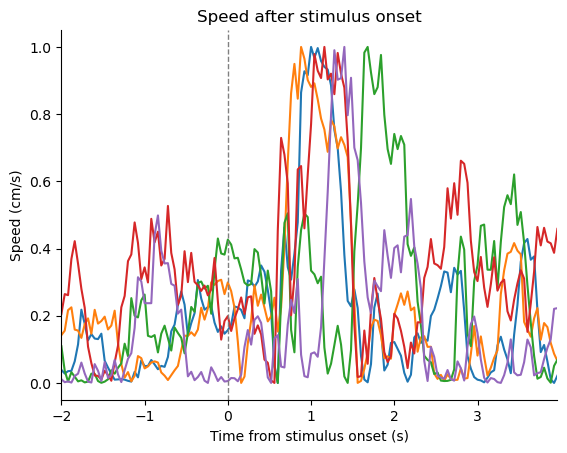

In [16]:
plot_all_speed(speed_inter_four, mouse_columns(n, 'four_second_interpolated'), 4, 4)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

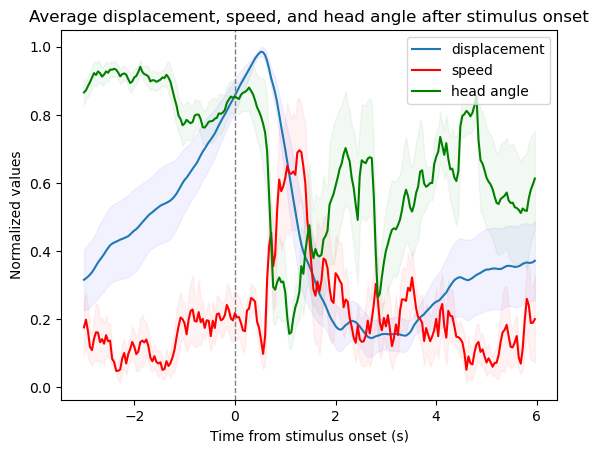

In [17]:
compile_parameters()

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

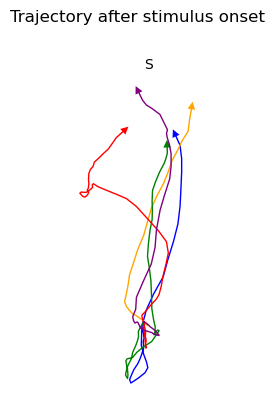

In [18]:
plot_compiled_trajectory(n)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

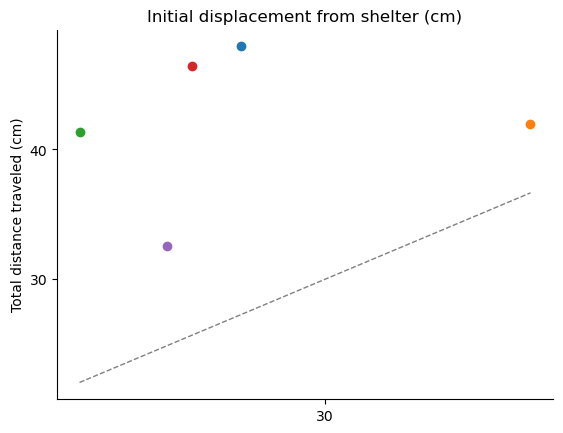

In [19]:
plot_linearity_ratio(n)

In [20]:
#the goal of this is to plot all of the trajectories together on one graph, not normalized.

def displacement_Compiled(M1_stop, M2_stop, M3_stop, M4_stop, M5_stop, length, M1_df, M2_df, M3_df, M4_df, M5_df):
    plt.figure()
    ax = plt.axes()

    #graph of displacement vs time after stimulus plt.figure() ax = plt.axes()
    M1_x = M1_df['time_set']
    M1_y = M1_df['displacement']
    M2_x = M2_df['time_set']
    M2_y = M2_df['displacement']
    M3_x = M3_df['time_set']
    M3_y = M3_df['displacement']
    M4_x = M4_df['time_set']
    M4_y = M4_df['displacement']
    M5_x = M5_df['time_set']
    M5_y = M5_df['displacement']
    
    

    ax.plot(M1_x,M1_y)
    ax.plot(M2_x,M2_y)
    ax.plot(M3_x,M3_y)
    ax.plot(M4_x,M4_y)
    ax.plot(M5_x,M5_y)
    
    ax.set_xlabel('Time from stimulus onset (s)')
    ax.set_ylabel('Displacement from shelter (cm)') #convert to cm - cm/s
    ax.set_title('Displacement from shelter after stimulus onset')


    if length<8:
        plt.axvline(x=0, color='gray', linestyle='--', linewidth=1, label='Vertical Line')
    else:
        plt.axvspan(0, stop, color = 'b', alpha =.08)
 
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    
    return plt    

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

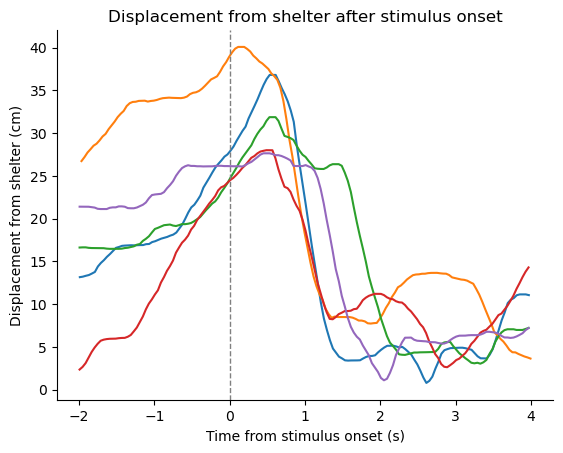

In [21]:
displacement_Compiled(M1_four_second['time_set'].iloc[-1], M2_four_second['time_set'].iloc[-1], M3_four_second['time_set'].iloc[-1], M4_four_second['time_set'].iloc[-1], M5_four_second['time_set'].iloc[-1], 4, M1_four_second, M2_four_second, M3_four_second, M4_four_second, M5_four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

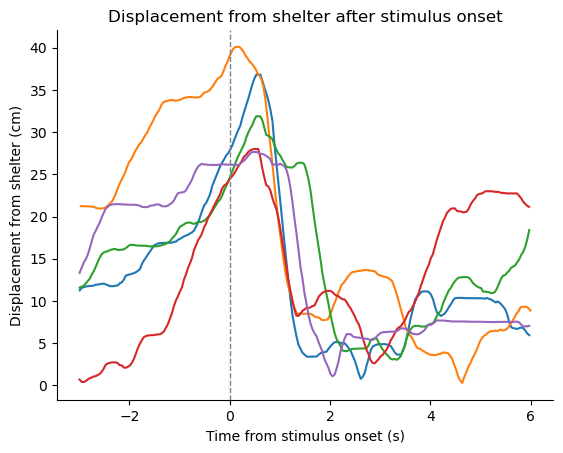

In [22]:
displacement_Compiled(M1_six_second['time_set'].iloc[-1], M2_six_second['time_set'].iloc[-1], M3_six_second['time_set'].iloc[-1], M4_six_second['time_set'].iloc[-1], M5_four_second['time_set'].iloc[-1], 6, M1_six_second, M2_six_second, M3_six_second, M4_six_second, M5_six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

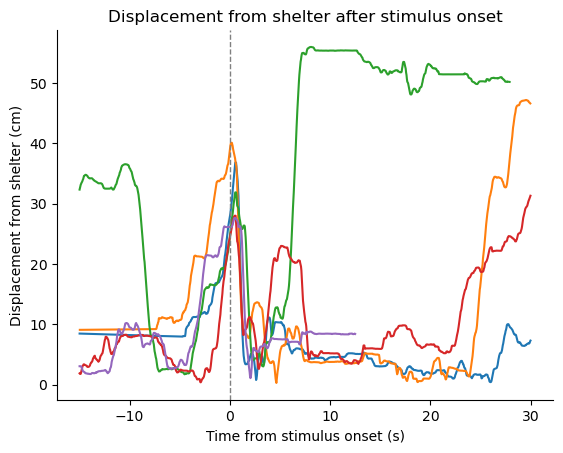

In [23]:
displacement_Compiled(M1_long_range['time_set'].iloc[-1], M2_long_range['time_set'].iloc[-1], M3_long_range['time_set'].iloc[-1], M4_long_range['time_set'].iloc[-1], M5_long_range['time_set'].iloc[-1], 6, M1_long_range, M2_long_range, M3_long_range, M4_long_range, M5_long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

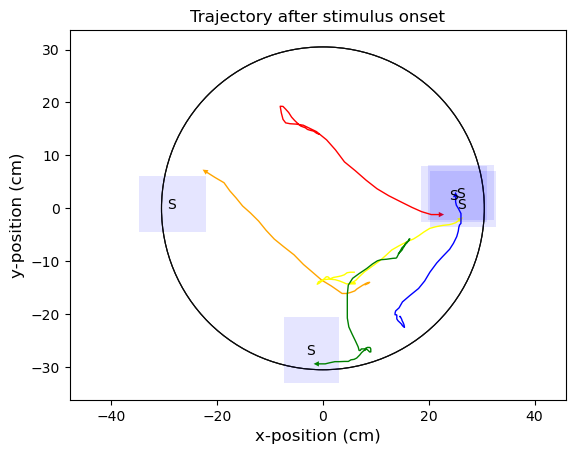

In [24]:
combined_trajectory(M1_shelter_x, M1_shelter_y, M1_x_diam, M1_y_diam, M1_escape_only, M2_shelter_x, M2_shelter_y, M2_x_diam, M2_y_diam, M2_escape_only, M3_shelter_x, M3_shelter_y, M3_x_diam, M3_y_diam, M3_escape_only, M4_shelter_x, M4_shelter_y, M4_x_diam, M4_y_diam, M4_escape_only, M5_shelter_x, M5_shelter_y, M5_x_diam, M5_y_diam, M5_escape_only)